In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import plotly.express as px
from statannotations.Annotator import Annotator
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/work/Include/')
import stat_process

In [52]:
import importlib
importlib.reload(stat_process)

<module 'stat_process' from '/work/Include/stat_process.py'>

In [2]:
def preProc(df):
    df.replace({"AI with caring motives":"Caring Motive",
            "AI with no motives":"No Motive",
            "AI with manipulative motives":"Manipulative Motive"}, inplace=True)

    name_dict = {"Caring motives":"Caring Motive",
                "No motive":"No Motive",
                "Manipulative/malicious motives":"Manipulative Motive"}
                
    stat_process.addProcessedCol(df, "From your own experience, what do you think the motive of the agent was?  Selected Choice", 
                    "Perceived Motives", name_dict)

    # aggregate UTAUT scores
    df['UTAUT Performance'] = df[['Agent: This agent would be useful in daily life',
                                'Agent: Using the agent would increase my chances of achieving things that are important to me', 
                                'Agent: Using the agent would help me accomplish things more quickly', 
                                'Agent: Using the agent would increase my productivity']].mean(axis=1)

    df['UTAUT Effort'] = df[['Agent: Learning how to talk to the agent was easy for me', 
                            'Agent: My interaction with the agent was clear and understandable', 
                            'Agent: The agent was easy to make use of', 
                            'Agent: It was easy for you to become skillful at making use of the agent']].mean(axis=1)

    df['UTAUT Hedonic'] = df[['Agent: Conversing with the agent is fun', 
                            'Agent: Conversing with the agent is enjoyable', 
                            'Agent: Conversing with the agent is entertaining']].mean(axis=1)

In [57]:
# import and process data
#df = pd.read_csv("/work/Results/Motive/Processed/motive_processed_july4.csv")
df = pd.read_csv("/work/Results/Eliza_Motive/Processed/eliza_motive_processed_sept9.csv")
preProc(df)

df

Unnamed: 0           Start Date             End Date Response Type  \
0             2  2022-07-06 14:57:21  2022-07-06 15:16:10    IP Address   
1             3  2022-07-06 15:01:35  2022-07-06 15:17:33    IP Address   
2             4  2022-07-06 15:05:51  2022-07-06 15:19:18    IP Address   
3             5  2022-07-06 15:12:37  2022-07-06 15:26:05    IP Address   
4             6  2022-07-06 15:14:17  2022-07-06 15:32:28    IP Address   
..          ...                  ...                  ...           ...   
145         160  2022-09-08 19:16:30  2022-09-08 20:15:24    IP Address   
146         161  2022-09-08 19:45:23  2022-09-08 20:16:59    IP Address   
147         162  2022-09-08 20:24:05  2022-09-08 20:53:05    IP Address   
148         163  2022-09-08 21:15:31  2022-09-08 21:43:14    IP Address   
149         164  2022-09-08 21:17:19  2022-09-08 22:06:56    IP Address   

    IP Address  Progress  Duration in seconds  Finished        Recorded Date  \
0      *******       100                 1128      True  2022-07-06 15:16:10   
1      *******       100                  958      True  2022-07-06 15:17:34   
2      *******       100                  806      True  2022-07-06 15:19:18   
3      *******       100                  807      True  2022-07-06 15:26:05   
4      *******       100                 1090      True  2022-07-06 15:32:28   
..         ...       ...                  ...       ...                  ...   
145    *******       100                 3534      True  2022-09-08 20:15:25   
146    *******       100                 1896      True  2022-09-08 20:16:59   
147    *******       100                 1739      True  2022-09-08 20:53:05   
148    *******       100                 1662      True  2022-09-08 21:43:14   
149    *******       100                 2977      True  2022-09-08 22:06:57   

           Response ID  ...                session_id  \
0    R_TnJyJNw8NcU93TH  ...  2022-07-06T21:01:13.853Z   
1    R_2BhRWJ3TAvNWyy7  ...  2022-07-06T21:04:02.065Z   
2    R_2QxsKAQvue2j2YG  ...  2022-07-06T21:07:29.812Z   
3    R_2ONNyKfYifHuDZ2  ...  2022-07-06T21:14:13.419Z   
4    R_3OknO3ZQSRU1HIf  ...  2022-07-06T21:18:12.846Z   
..                 ...  ...                       ...   
145  R_8iRuXhseo3EACJ3  ...  2022-09-09T01:41:50.633Z   
146  R_1OVnJlQBfoGh765  ...  2022-09-09T01:50:42.384Z   
147  R_RDjpKB6VedXrqN3  ...  2022-09-09T02:28:31.039Z   
148  R_6RlekHjFGlbao1z  ...  2022-09-09T03:29:18.629Z   
149  R_bvVrXWpKDCgjS13  ...  2022-09-09T03:23:49.098Z   

                                    convo_conversation       convo_group_id  \
0     >AI: I am Melu, a mental health companion. I ...  Manipulative Motive   
1     >AI: I am Melu, a mental health companion. I ...            No Motive   
2     >AI: I am Melu, a mental health companion. I ...        Caring Motive   
3     >AI: I am Melu, a mental health companion. I ...  Manipulative Motive   
4     >AI: I am Melu, a mental health companion. I ...        Caring Motive   
..                                                 ...                  ...   
145   >AI: I am Melu, a mental health companion. I ...            No Motive   
146   >AI: I am Melu, a mental health companion. I ...  Manipulative Motive   
147   >AI: I am Melu, a mental health companion. I ...  Manipulative Motive   
148   >AI: I am Melu, a mental health companion. I ...        Caring Motive   
149   >AI: I am Melu, a mental health companion. I ...        Caring Motive   

    convo_AI_turns convo_human_turns convo_total_turns    Perceived Motives  \
0               31                30                61            No Motive   
1               50                49                99            No Motive   
2               85                84               169            No Motive   
3               68                67               135  Manipulative Motive   
4               39                38                77            No Motive   
..             ...               ..

In [59]:
# get list of questions to vizualize
start = df.columns.get_loc("Agent: You would recommend this agent for your friend")
end = start + 13
tli_s = df.columns.get_loc("Mental Demand: How mentally demanding was the task?")
tli_e = tli_s + 6
utaut = [df.columns.get_loc("UTAUT Performance"),
         df.columns.get_loc("UTAUT Effort"),
         df.columns.get_loc("UTAUT Hedonic")]
other = [df.columns.get_loc("convo_total_turns")]
vizlist_tli = list(range(tli_s,tli_e))
vizlist = list(range(start,end)) + vizlist_tli + utaut + other

vizlist_lik = list(range(start,end)) + utaut
vizlist_other = list(range(tli_s,tli_e)) + other
vizlist

[49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 73,
 74,
 75,
 76,
 77,
 78,
 101,
 102,
 103,
 99]

In [60]:
conditions_list = ["No Motive", "Manipulative Motive", "Caring Motive"]
ivar = "assigned_group"
my_pal = {"No Motive": "#ababab", "Manipulative Motive": "#d16969", "Caring Motive":"#87c771"}

[StatTest] Minimal Sample Size was met. Check if sample sizes are roughly equal.
---------------------------------------------
Performing Equal Variances Test...
Performing Levene Test...
homogeneity test: LeveneResult(statistic=0.2552790987947639, pvalue=0.7750429693554575)
The populations have equal variances.
[StatTest] Assumption of Equal Variances was met. Run basic ANOVA.
---------------------------------------------
Performing ANOVA
F_onewayResult(statistic=0.2552790987947639, pvalue=0.7750429693554575)
oneway ANOVA: no significance. No significant difference between means of the groups.
[StatTest] Tukey found NO statistically significance found between groups.
---------------------------------------------
Performing Tukey Post-Hoc Test...
             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
       group1              group2       meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------------
      Car

(0.7750429693554575, 'basic ANOVA')

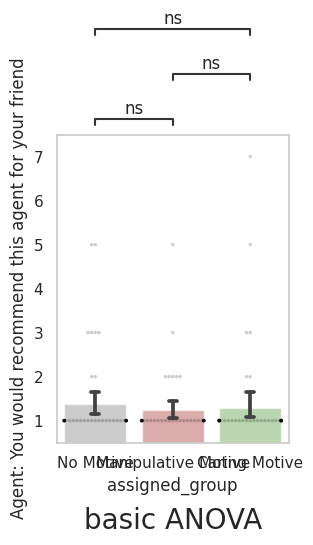

In [61]:
dvar = df.columns[vizlist_lik[0]]
stat_process.StatTest(df, ivar, dvar, conditions_list, viz=True, pal=my_pal, ylims=(0.5,7.5))

**********************************
Agent: You would recommend this agent for your friend
[StatTest] Minimal Sample Size was met. Check if sample sizes are roughly equal.
---------------------------------------------
Performing Equal Variances Test...
Performing Levene Test...
homogeneity test: LeveneResult(statistic=5.510821438764715, pvalue=0.004863539061412032)
The populations do NOT have equal variances.
[StatTest] Assumption of Equal Variances was violated. Run ANOVA with Welch Statistic.
F_onewayResult(statistic=4.33612721629483, pvalue=0.015567166863270372)
ANOVA with Welch Statistic: SIGNIFICANCE. At least one of the means of the groups is different.
[StatTest] ANOVA with Welch Statistic found significance. Run Tukey post-hoc test.
---------------------------------------------
Performing Tukey Post-Hoc Test...
             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
-------------

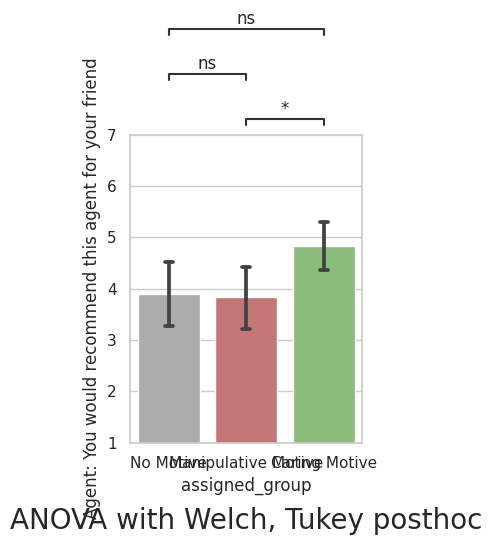

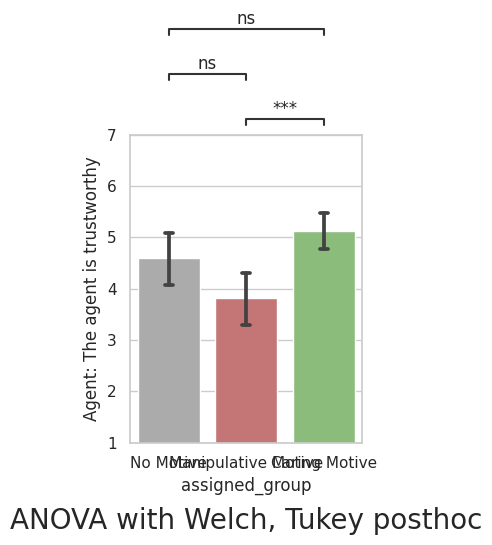

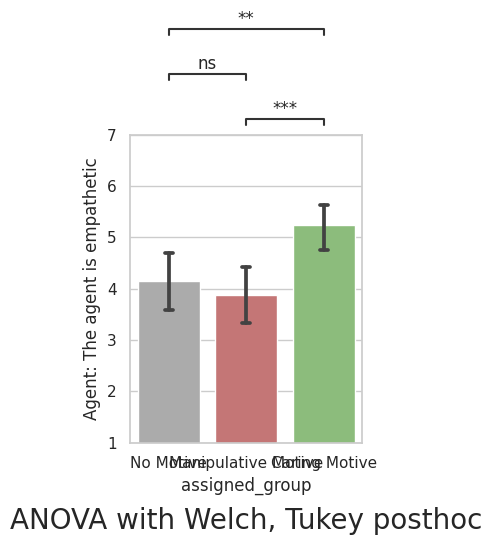

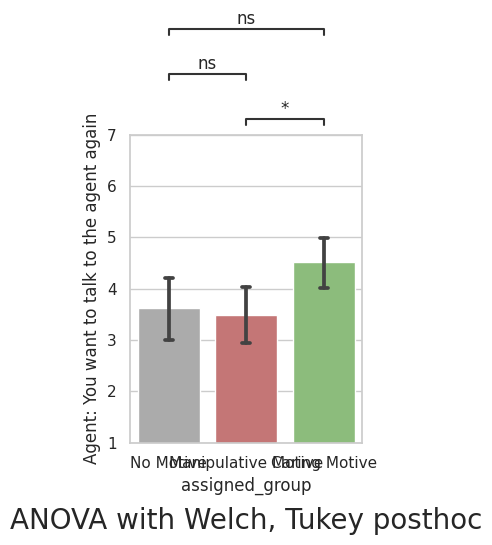

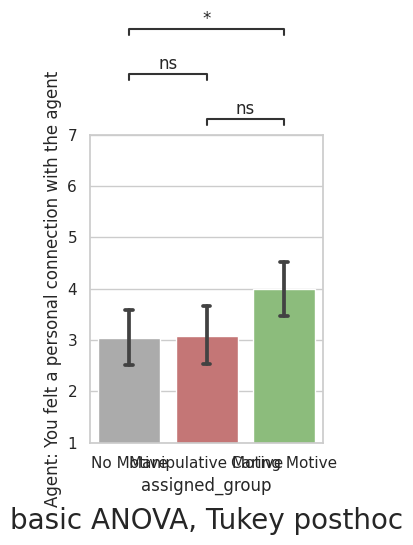

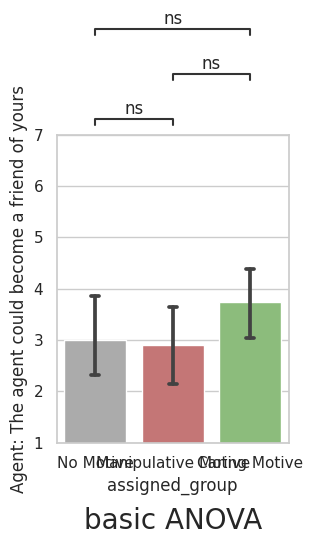

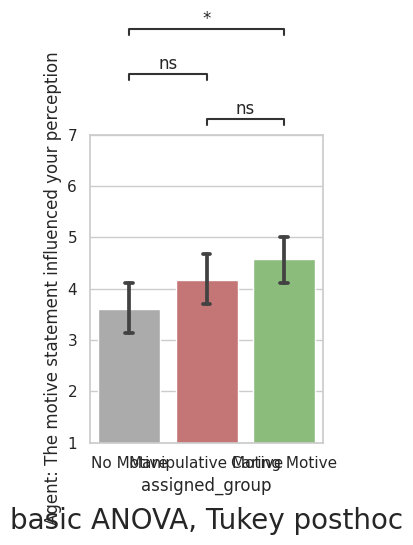

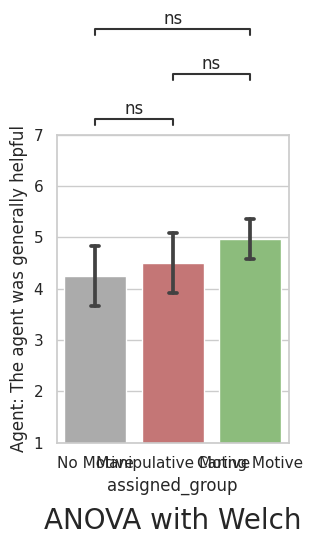

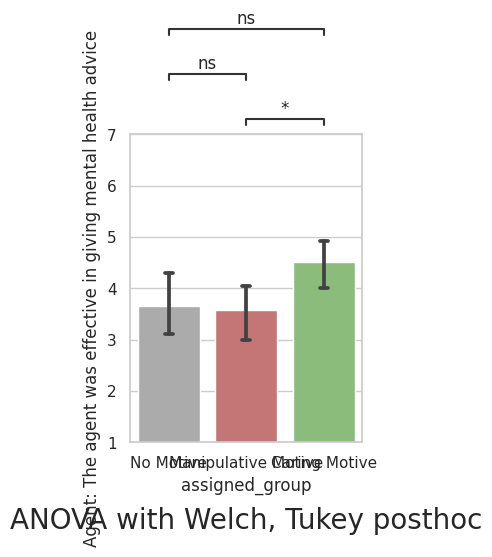

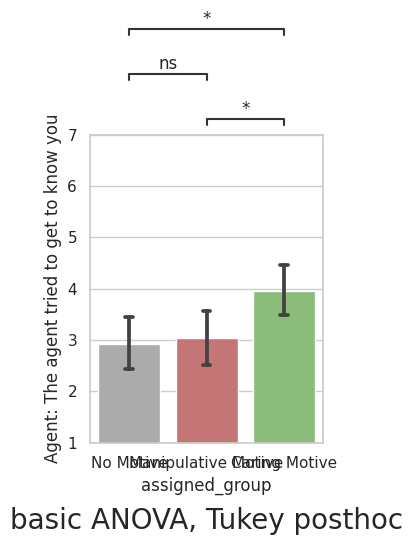

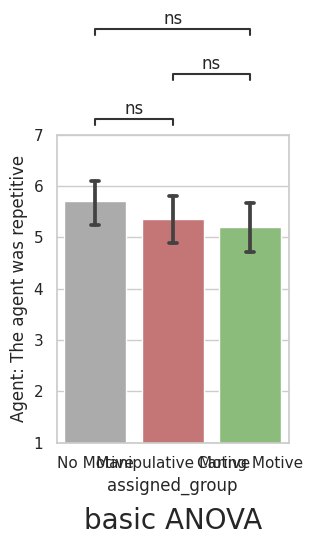

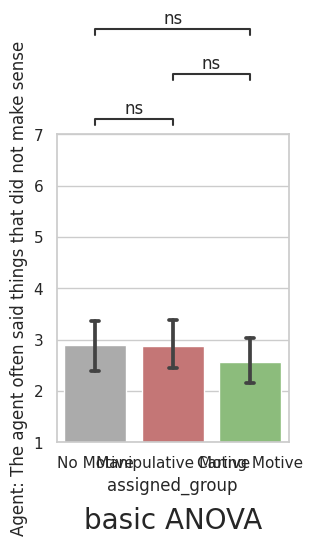

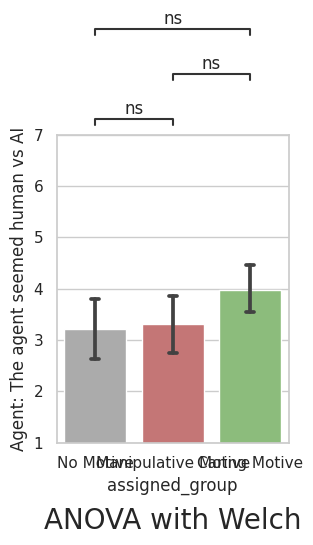

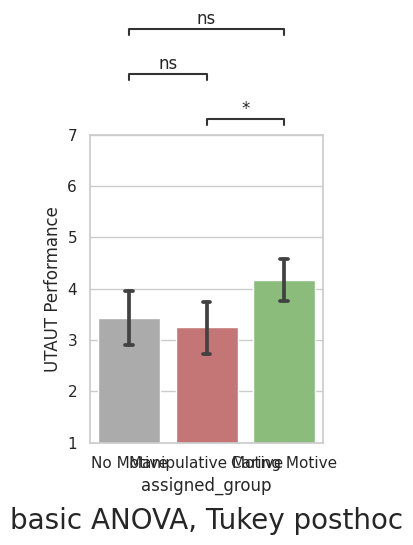

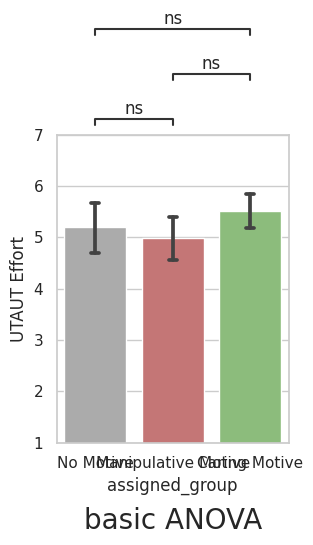

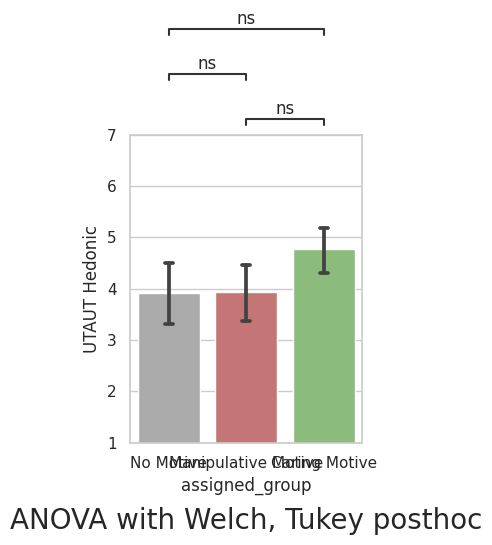

In [23]:
for i in vizlist_lik:
    dvar = df.columns[i]
    print("**********************************")
    print(dvar)
    stat_process.StatTest(df, ivar, dvar, conditions_list, viz=True, pal=my_pal, ylims=(1,7))

**********************************
Agent: You would recommend this agent for your friend
[StatTest] Minimal Sample Size was met. Check if sample sizes are roughly equal.
---------------------------------------------
Performing Equal Variances Test...
Performing Levene Test...
homogeneity test: LeveneResult(statistic=5.510821438764715, pvalue=0.004863539061412032)
The populations do NOT have equal variances.
[StatTest] Assumption of Equal Variances was violated. Run ANOVA with Welch Statistic.
F_onewayResult(statistic=4.33612721629483, pvalue=0.015567166863270372)
ANOVA with Welch Statistic: SIGNIFICANCE. At least one of the means of the groups is different.
[StatTest] ANOVA with Welch Statistic found significance. Run Tukey post-hoc test.
---------------------------------------------
Performing Tukey Post-Hoc Test...
             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
-------------

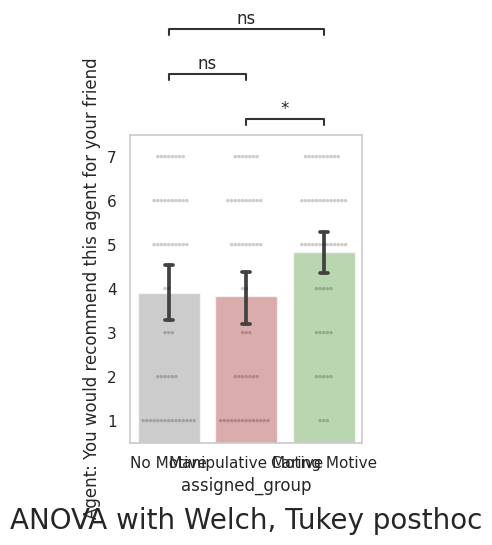

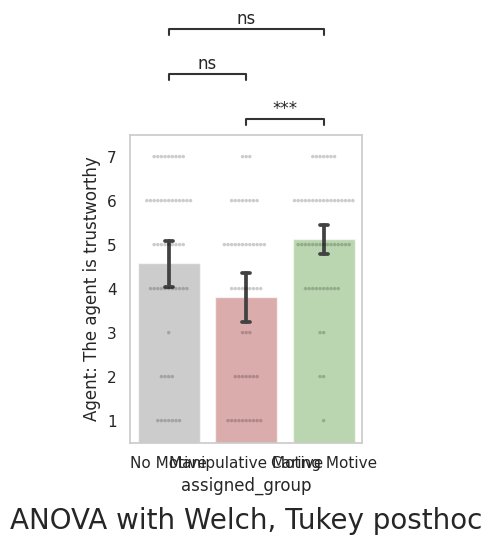

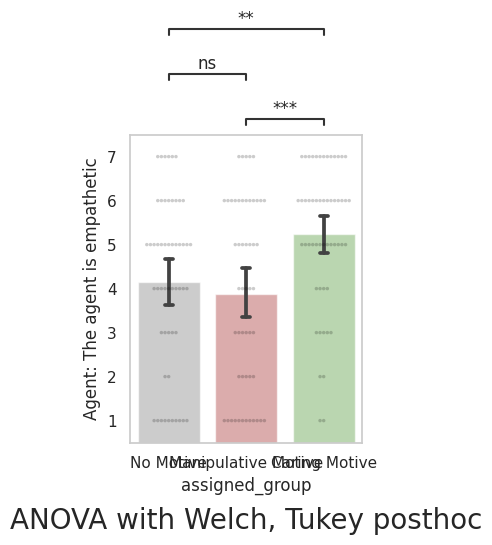

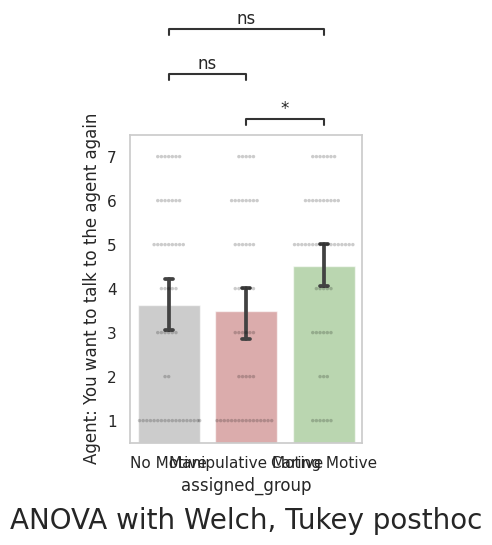

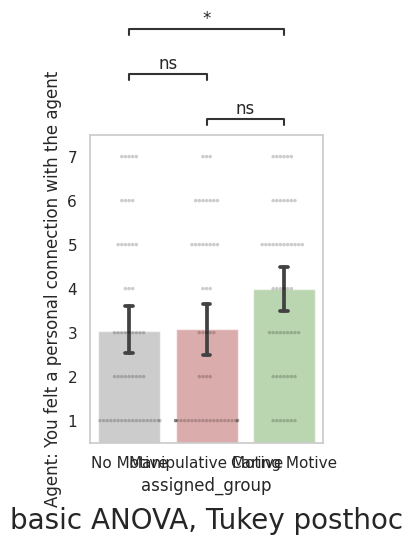

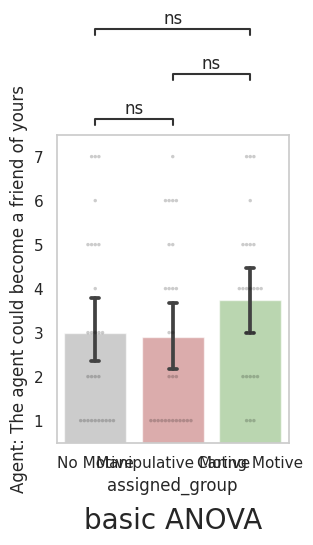

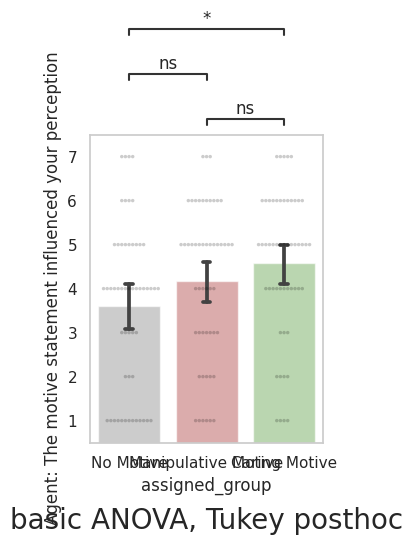

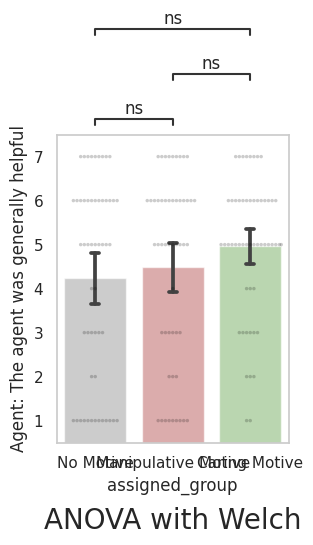

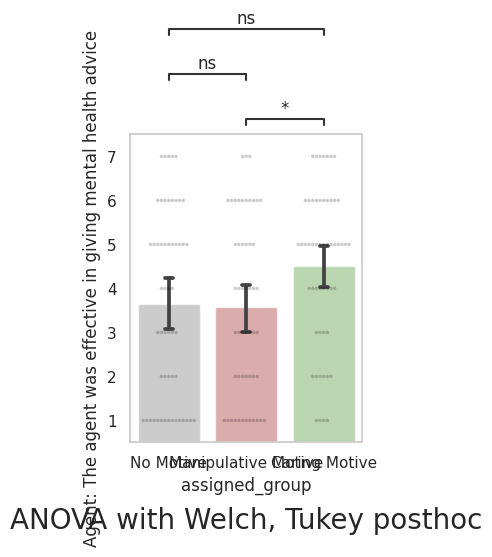

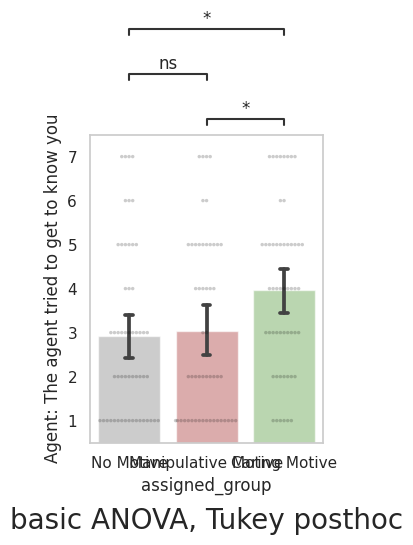

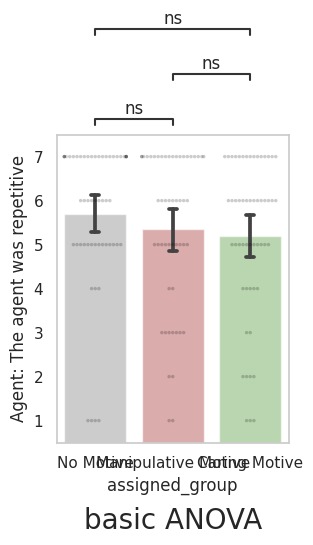

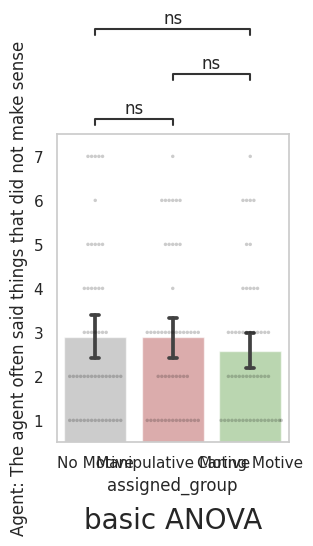

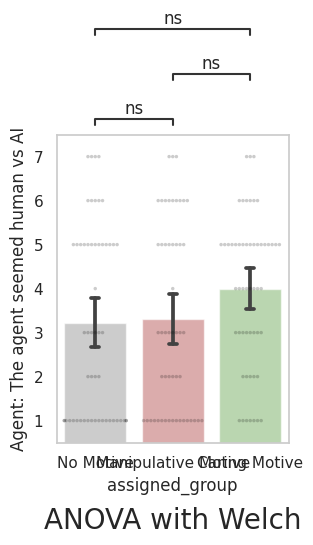

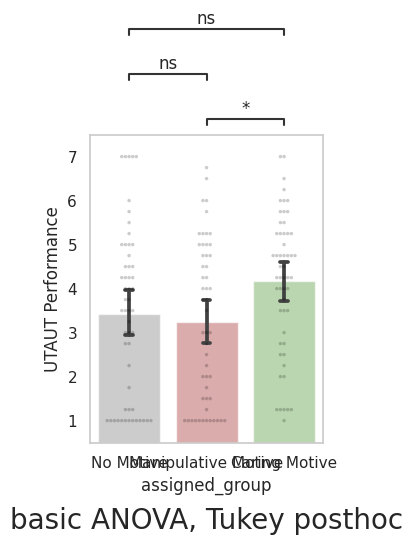

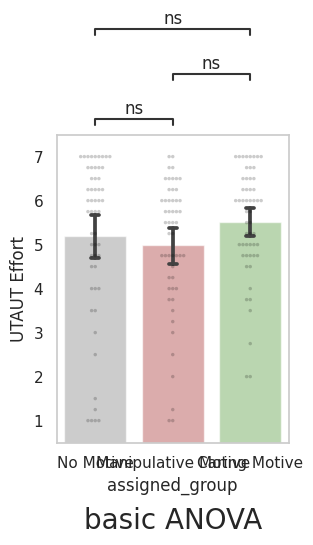

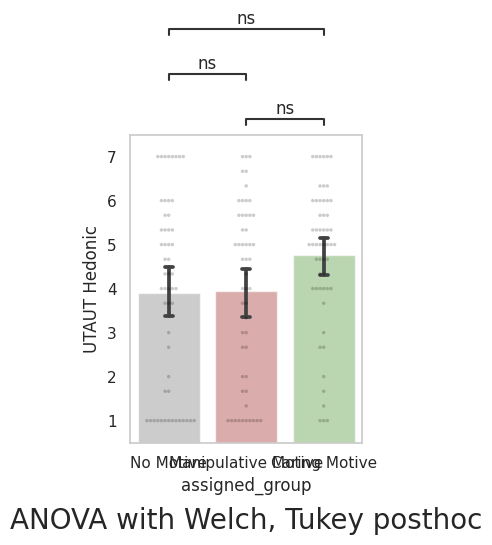

In [54]:
for i in vizlist_lik:
    dvar = df.columns[i]
    print("**********************************")
    print(dvar)
    stat_process.StatTest(df, ivar, dvar, conditions_list, viz=True, pal=my_pal, ylims=(0.5,7.5))

**********************************
Agent: You would recommend this agent for your friend
[StatTest] Minimal Sample Size was met. Check if sample sizes are roughly equal.
---------------------------------------------
Performing Equal Variances Test...
Performing Levene Test...
homogeneity test: LeveneResult(statistic=0.2552790987947639, pvalue=0.7750429693554575)
The populations have equal variances.
[StatTest] Assumption of Equal Variances was met. Run basic ANOVA.
---------------------------------------------
Performing ANOVA
F_onewayResult(statistic=0.2552790987947639, pvalue=0.7750429693554575)
oneway ANOVA: no significance. No significant difference between means of the groups.
[StatTest] Tukey found NO statistically significance found between groups.
---------------------------------------------
Performing Tukey Post-Hoc Test...
             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
       group1              group2       meandiff p-adj   lower  upper  rejec

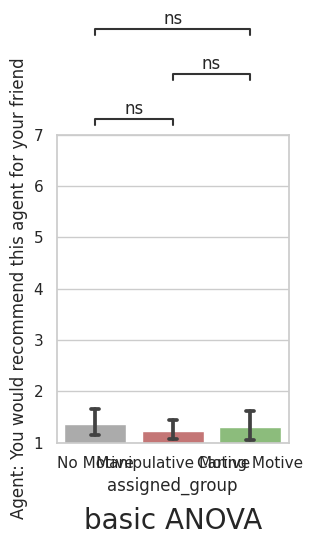

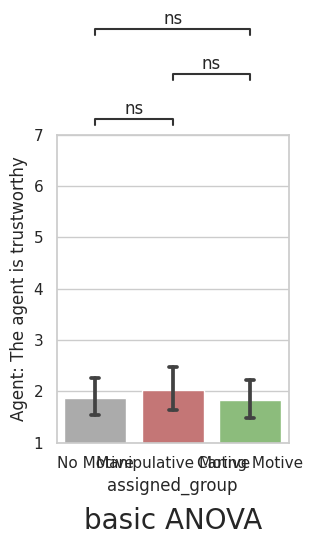

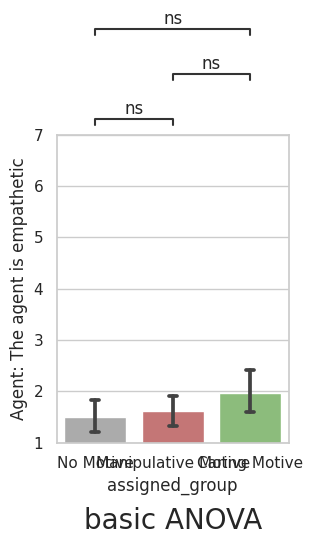

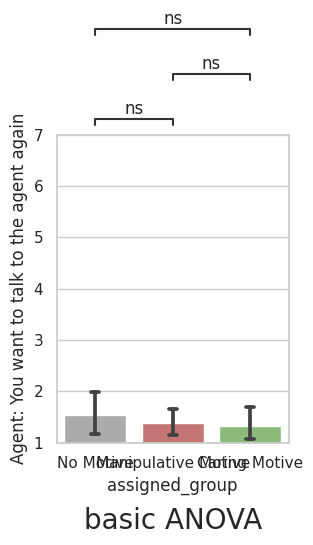

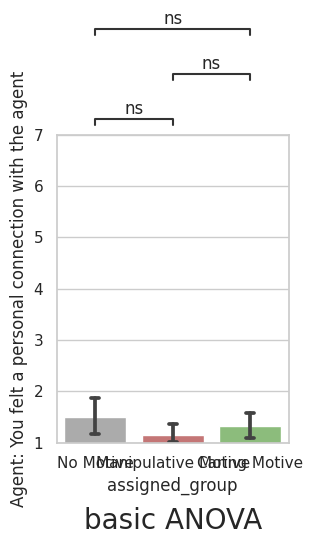

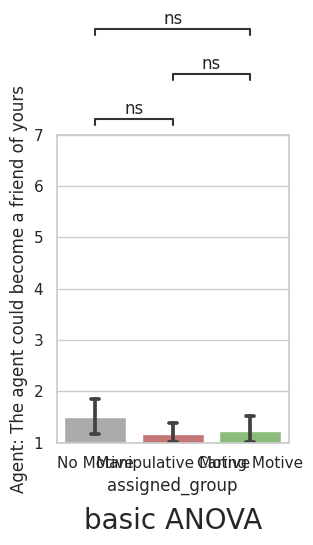

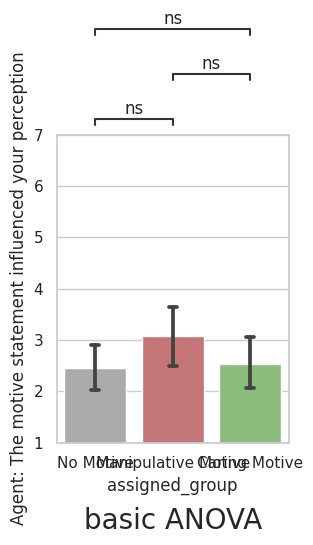

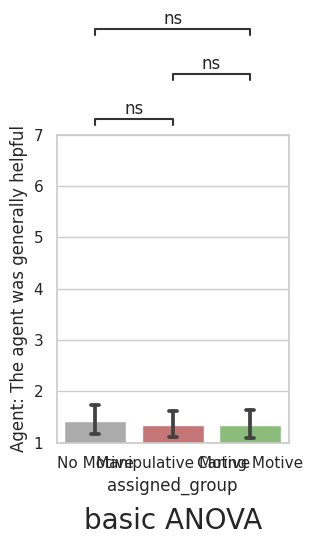

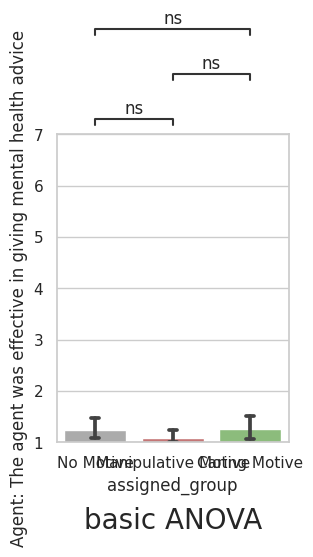

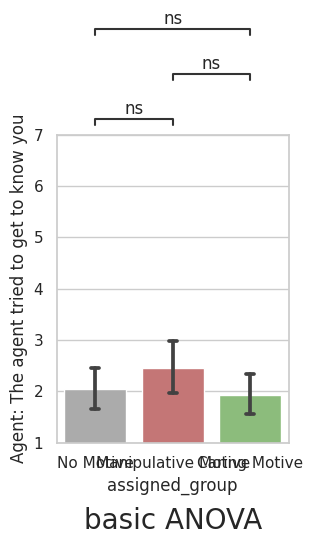

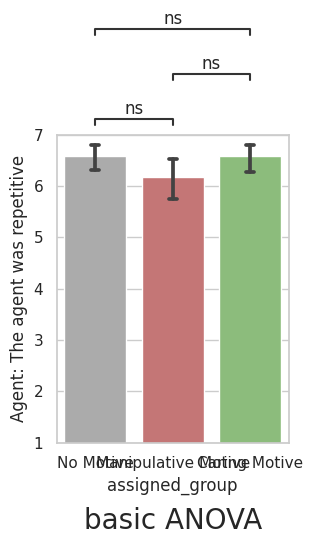

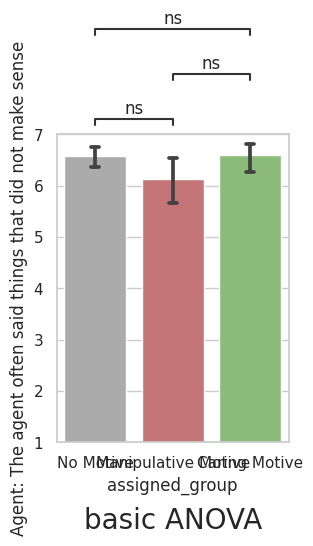

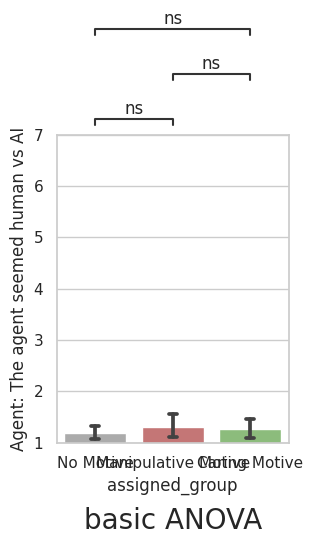

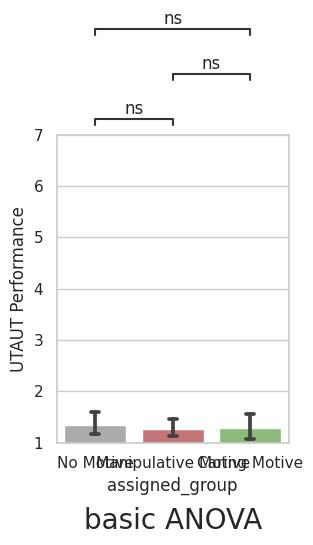

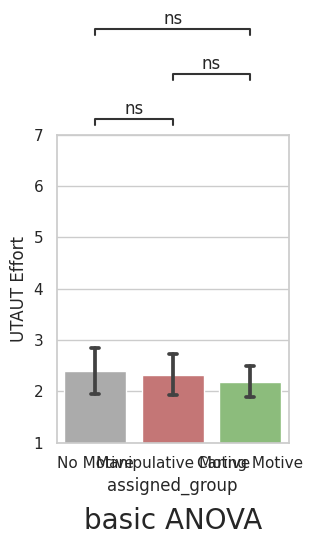

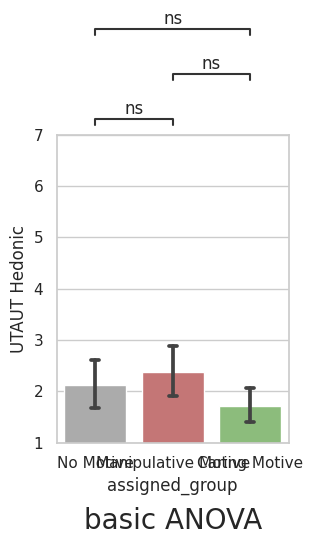

In [11]:
# ELIZA - Assigned

for i in vizlist_lik:
    dvar = df.columns[i]
    print("**********************************")
    print(dvar)
    stat_process.StatTest(df, ivar, dvar, conditions_list, viz=True, pal=my_pal, ylims=(1,7))

[StatTest] Minimal Sample Size was met. Check if sample sizes are roughly equal.
---------------------------------------------
Performing Equal Variances Test...
Performing Levene Test...
homogeneity test: LeveneResult(statistic=5.510821438764715, pvalue=0.004863539061412032)
The populations do NOT have equal variances.
[StatTest] Assumption of Equal Variances was violated. Run ANOVA with Welch Statistic.
F_onewayResult(statistic=4.33612721629483, pvalue=0.015567166863270372)
ANOVA with Welch Statistic: SIGNIFICANCE. At least one of the means of the groups is different.
[StatTest] ANOVA with Welch Statistic found significance. Run Tukey post-hoc test.
---------------------------------------------
Performing Tukey Post-Hoc Test...
             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------
      Caring Motive Man

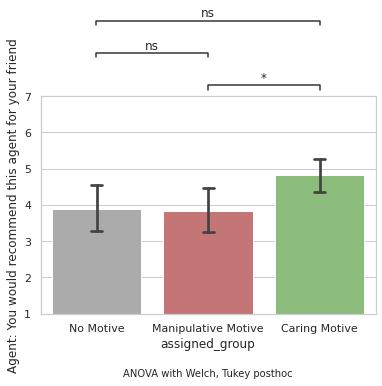

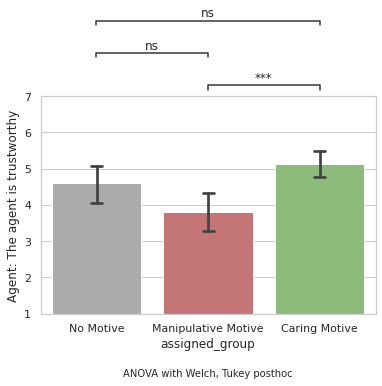

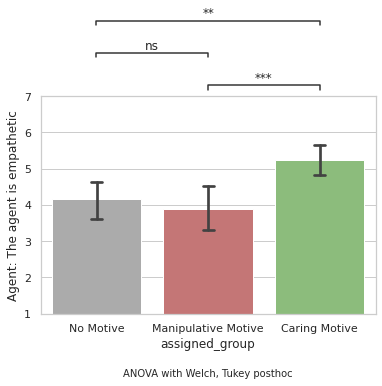

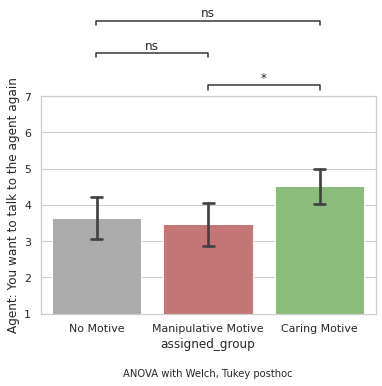

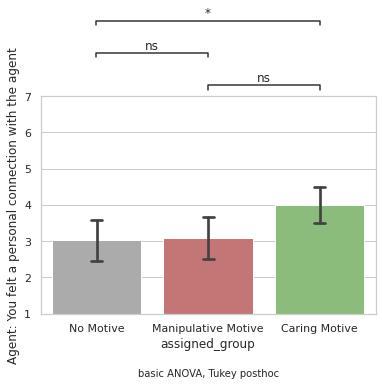

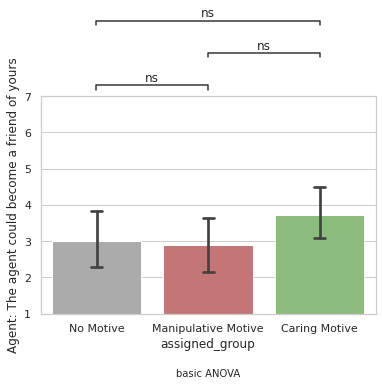

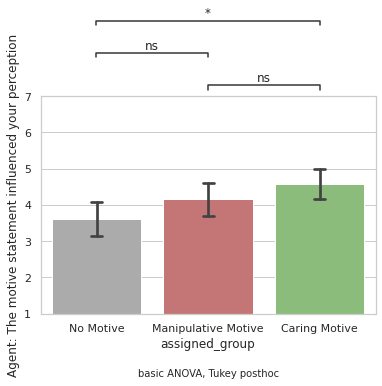

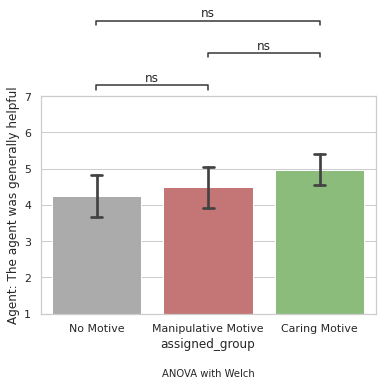

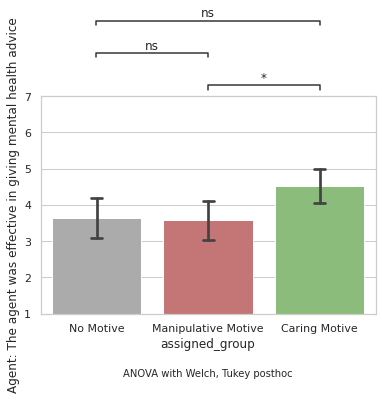

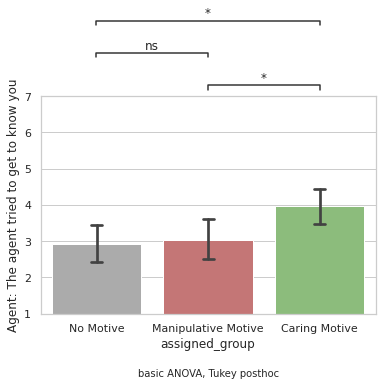

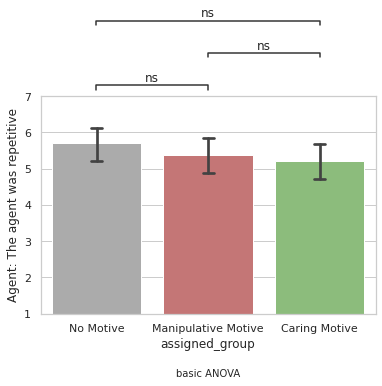

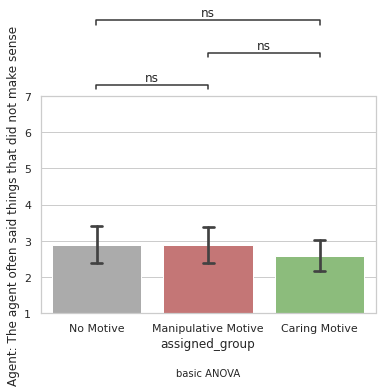

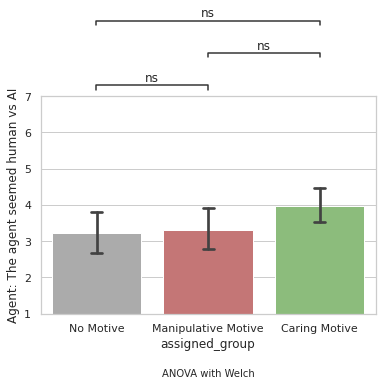

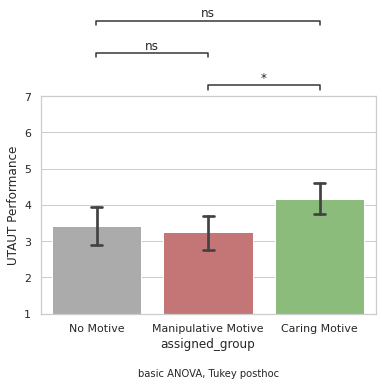

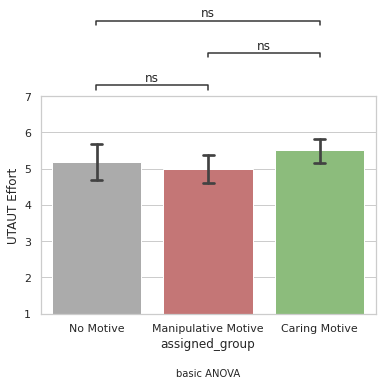

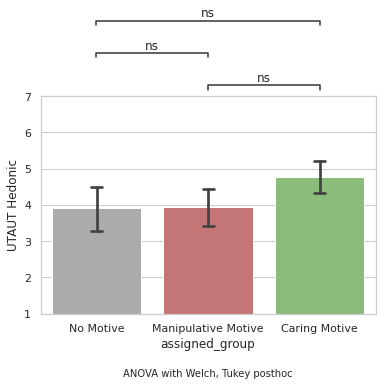

In [ ]:
for i in vizlist_lik:
    dvar = df.columns[i]
    print(dvar)
    stat_process.StatTest(df, ivar, dvar, conditions_list, viz=True, pal=my_pal, ylims=(1,7))

[StatTest] Minimal Sample Size was not met. Proceed to check Normality Assumption.
---------------------------------------------
Performing Shapiro-Wilk normality test...
alpha_value: 0.05
ShapiroResult(statistic=0.849583089351654, pvalue=1.8589227011034382e-06)
Series No Motive: is NOT normal. W:0.849583089351654, Pvalue: 1.8589227011034382e-06
ShapiroResult(statistic=0.7251454591751099, pvalue=0.00032385587110184133)
Series Manipulative Motive: is NOT normal. W:0.7251454591751099, Pvalue: 0.00032385587110184133
ShapiroResult(statistic=0.8769989013671875, pvalue=1.898152731882874e-06)
Series Caring Motive: is NOT normal. W:0.8769989013671875, Pvalue: 1.898152731882874e-06
Normality Assumption Met? : False
[StatTest]  Normality Assumption was not met. Proceed with Kruskal-Wallis Test
---------------------------------------------
alpha: 0.05
KruskalResult(statistic=22.007063410466486, pvalue=1.6642819343319887e-05)
Significant Result for Kruskal Wallis.
Compute the DUNN post-hoc test.
 

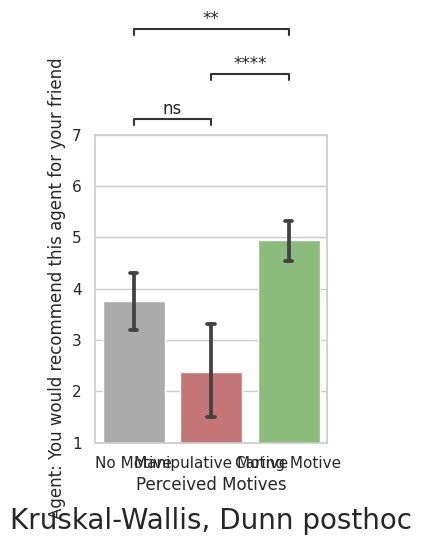

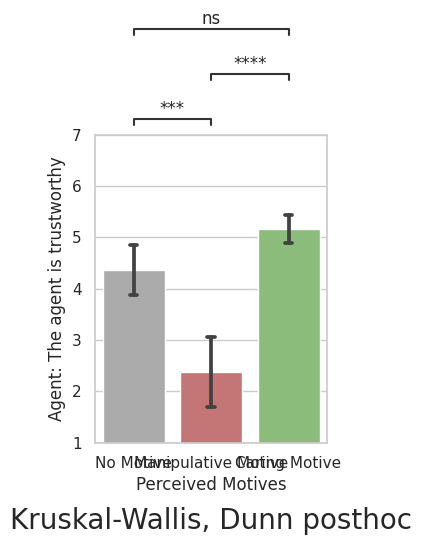

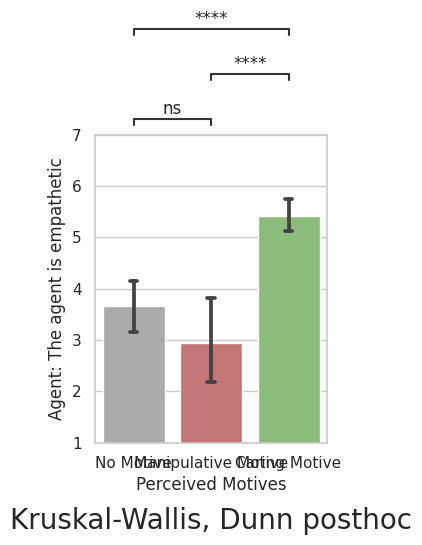

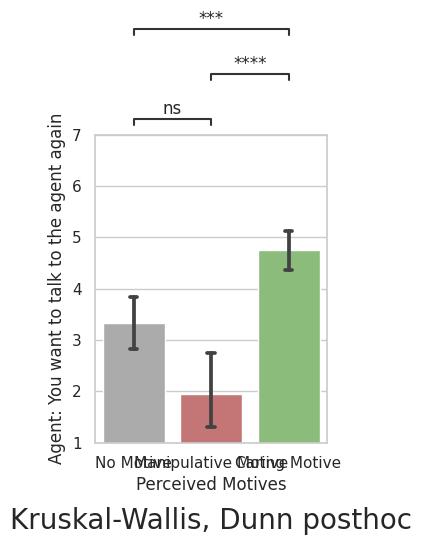

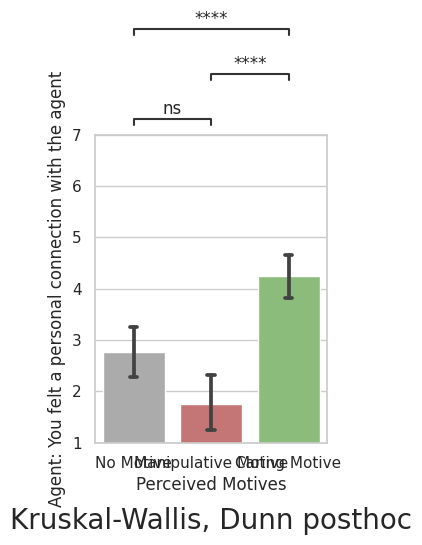

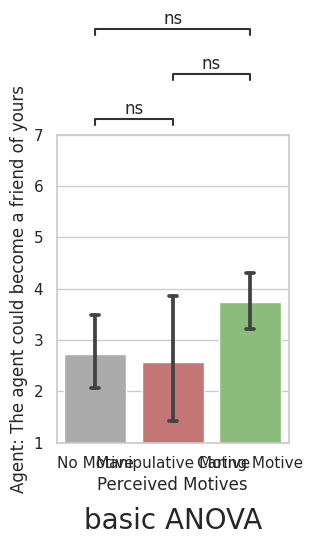

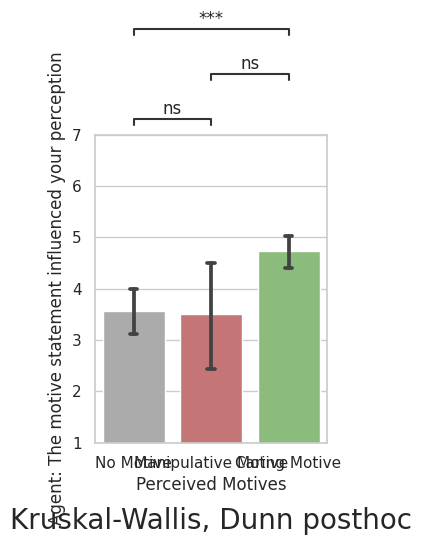

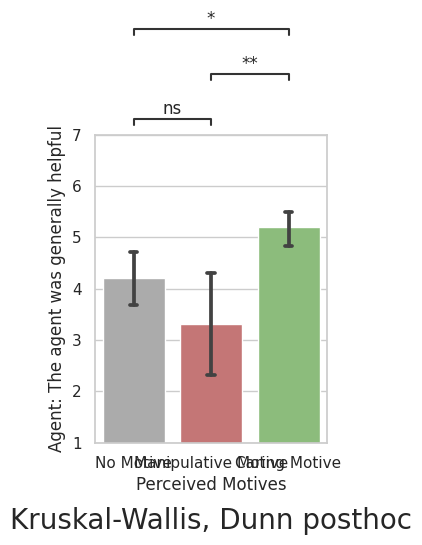

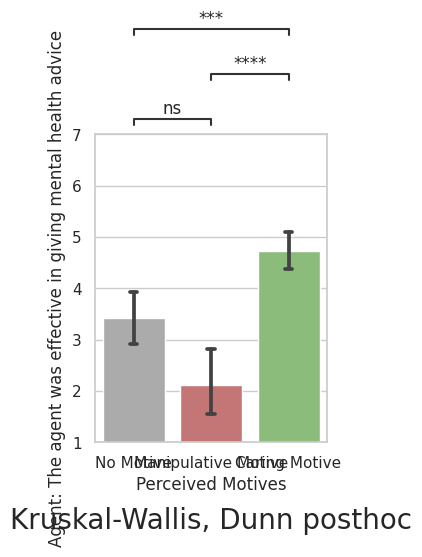

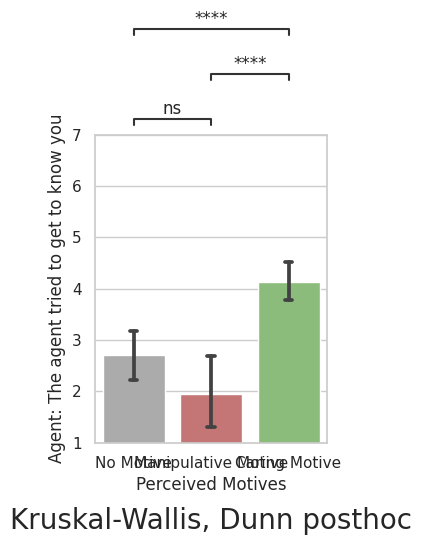

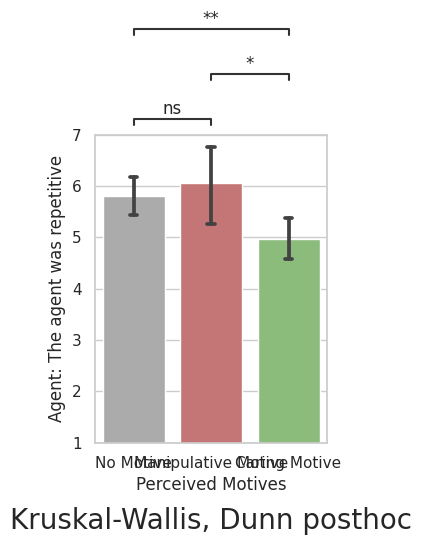

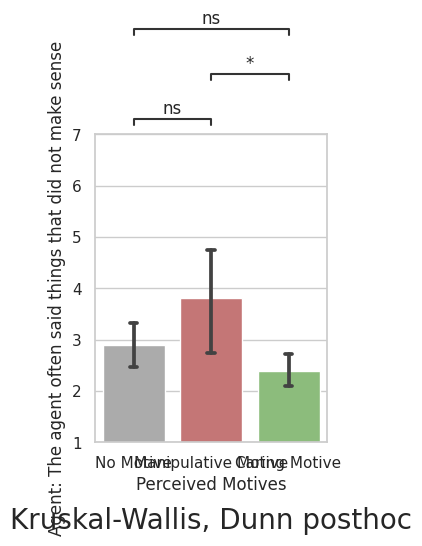

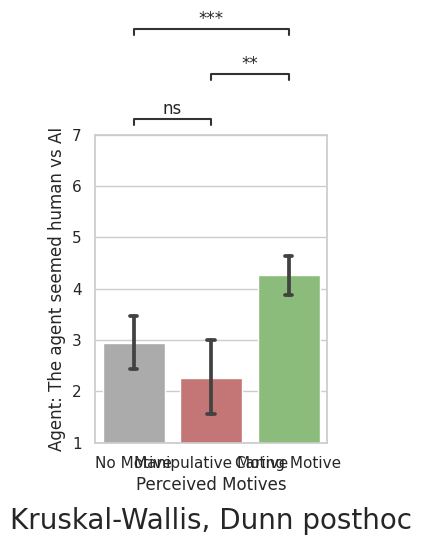

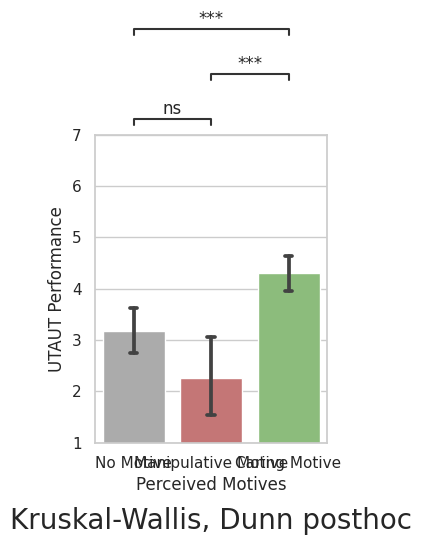

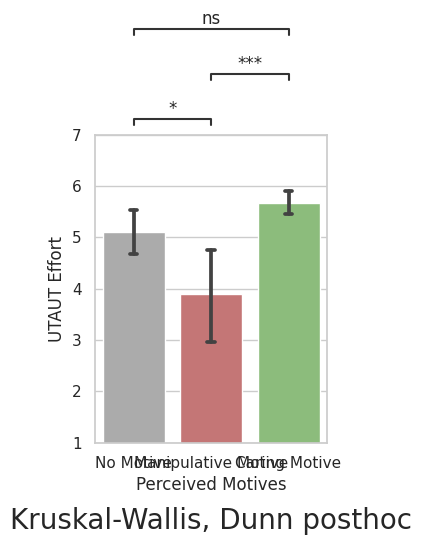

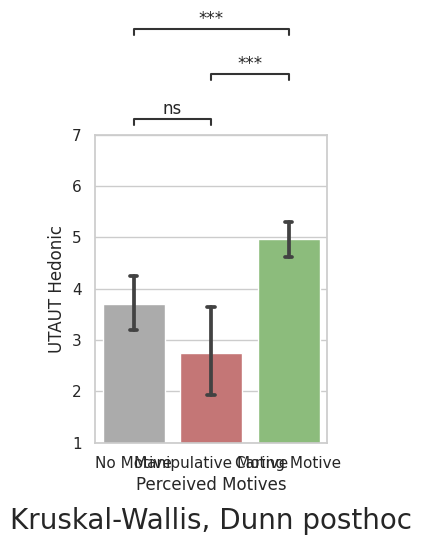

In [24]:
for i in vizlist_lik:
    dvar = df.columns[i]
    stat_process.StatTest(df, "Perceived Motives", dvar, conditions_list, viz=True, pal=my_pal, ylims=(1,7))

[StatTest] Minimal Sample Size was not met. Proceed to check Normality Assumption.
---------------------------------------------
Performing Shapiro-Wilk normality test...
alpha_value: 0.05
ShapiroResult(statistic=0.849583089351654, pvalue=1.8589227011034382e-06)
Series No Motive: is NOT normal. W:0.849583089351654, Pvalue: 1.8589227011034382e-06
ShapiroResult(statistic=0.7251454591751099, pvalue=0.00032385587110184133)
Series Manipulative Motive: is NOT normal. W:0.7251454591751099, Pvalue: 0.00032385587110184133
ShapiroResult(statistic=0.8769989013671875, pvalue=1.898152731882874e-06)
Series Caring Motive: is NOT normal. W:0.8769989013671875, Pvalue: 1.898152731882874e-06
Normality Assumption Met? : False
[StatTest]  Normality Assumption was not met. Proceed with Kruskal-Wallis Test
---------------------------------------------
alpha: 0.05
KruskalResult(statistic=22.007063410466486, pvalue=1.6642819343319887e-05)
Significant Result for Kruskal Wallis.
Compute the DUNN post-hoc test.
 

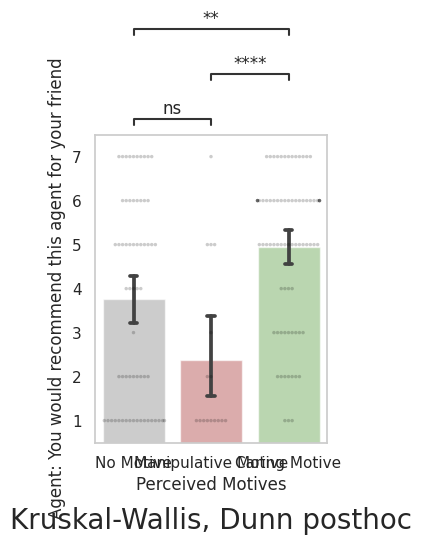

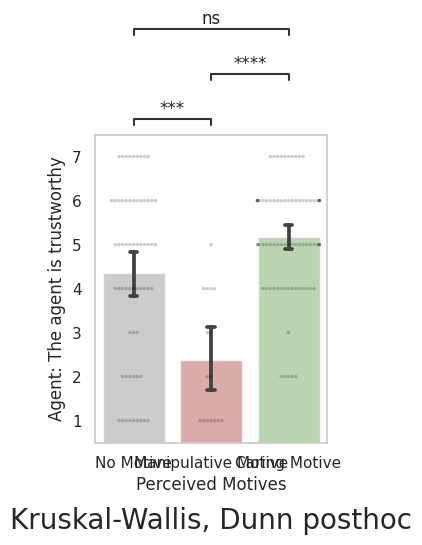

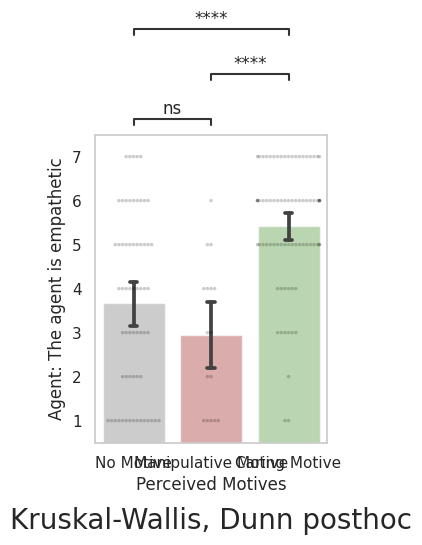

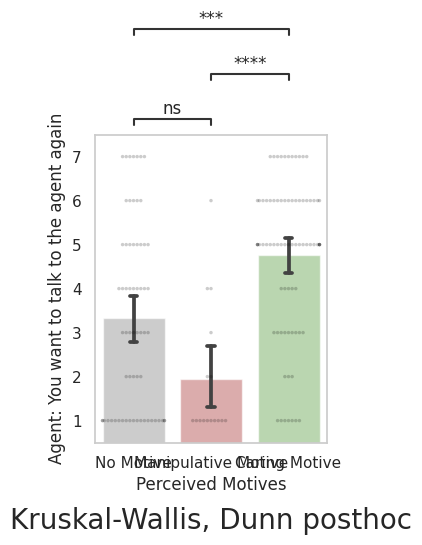

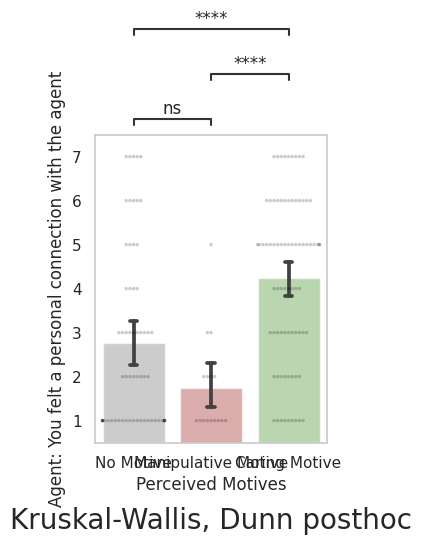

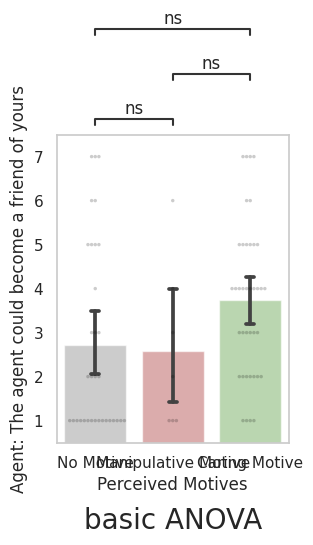

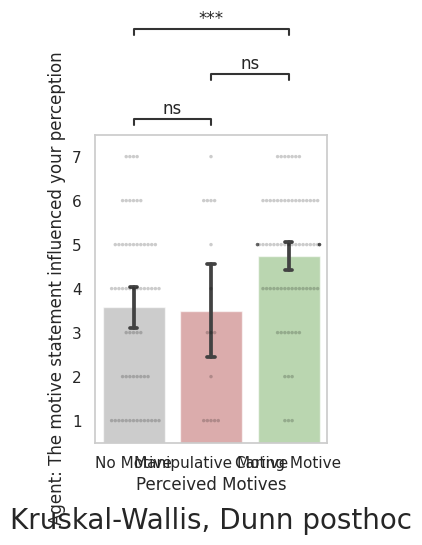

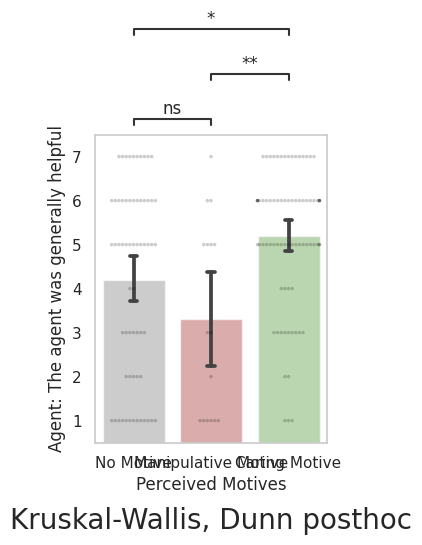

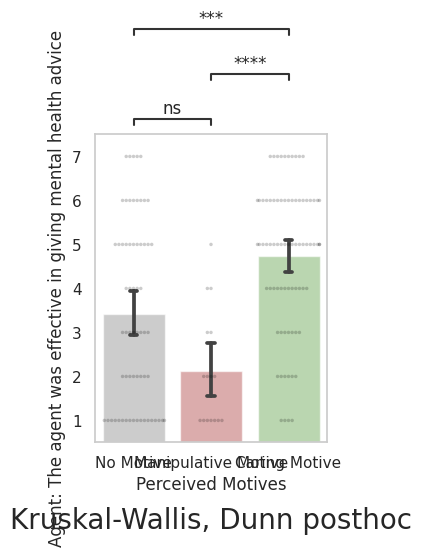

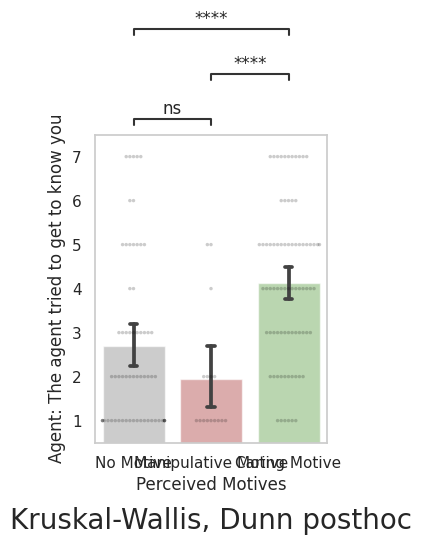

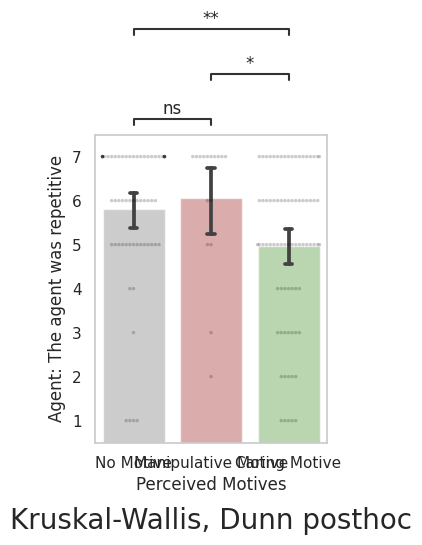

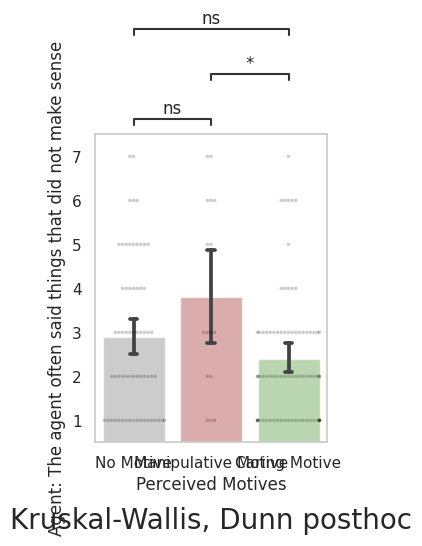

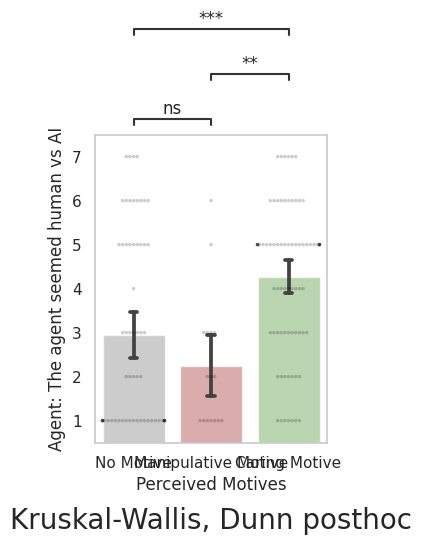

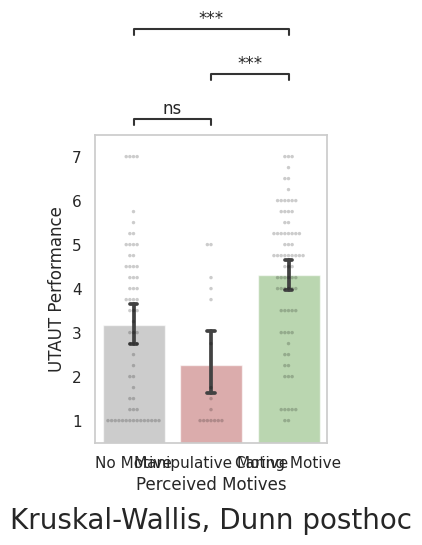

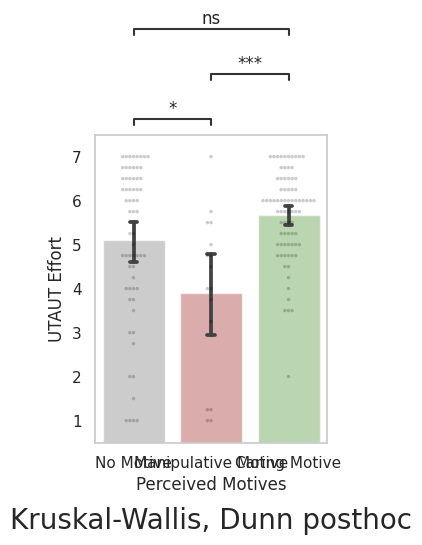

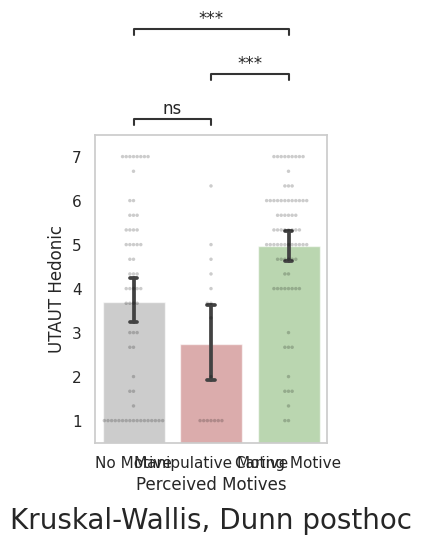

In [56]:
for i in vizlist_lik:
    dvar = df.columns[i]
    stat_process.StatTest(df, "Perceived Motives", dvar, conditions_list, viz=True, pal=my_pal, ylims=(0.5,7.5))

**********************************
Agent: You would recommend this agent for your friend
[StatTest] Minimal Sample Size was not met. Proceed to check Normality Assumption.
---------------------------------------------
Performing Shapiro-Wilk normality test...
alpha_value: 0.05
ShapiroResult(statistic=0.38178759813308716, pvalue=1.818382998016166e-19)
Series No Motive: is NOT normal. W:0.38178759813308716, Pvalue: 1.818382998016166e-19
ShapiroResult(statistic=1.0, pvalue=1.0)
Series Manipulative Motive: IS normal. W:1.0, Pvalue: 1.0
ShapiroResult(statistic=0.6758687496185303, pvalue=0.0001387922529829666)
Series Caring Motive: is NOT normal. W:0.6758687496185303, Pvalue: 0.0001387922529829666
Normality Assumption Met? : False
[StatTest]  Normality Assumption was not met. Proceed with Kruskal-Wallis Test
---------------------------------------------
alpha: 0.05
KruskalResult(statistic=11.040950352978433, pvalue=0.004003944909502941)
Significant Result for Kruskal Wallis.
Compute the DUNN

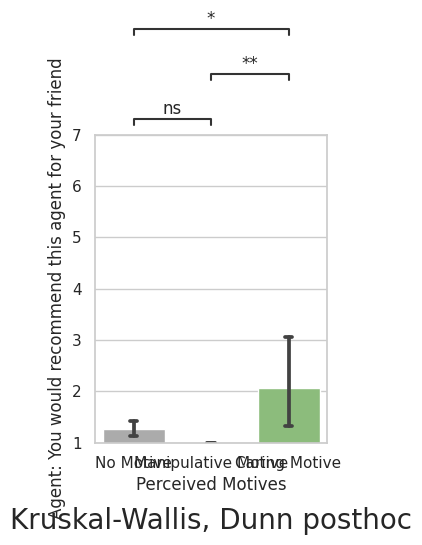

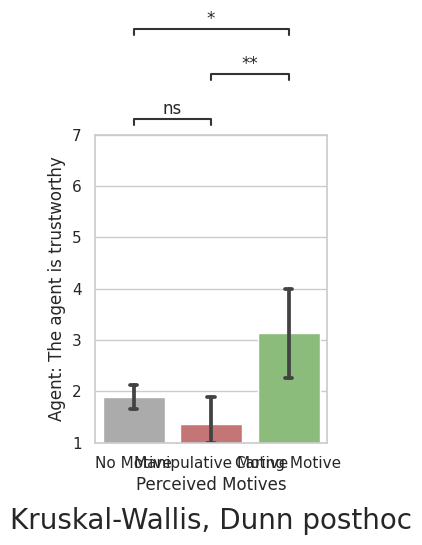

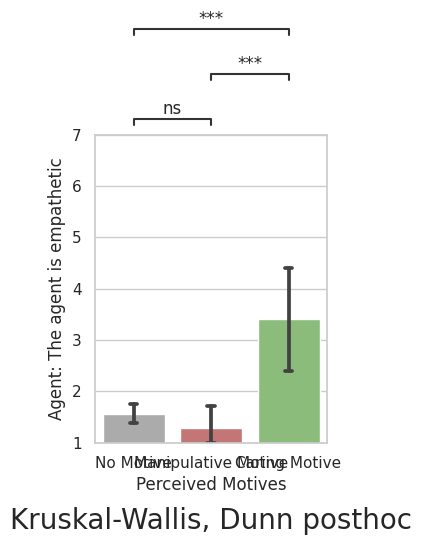

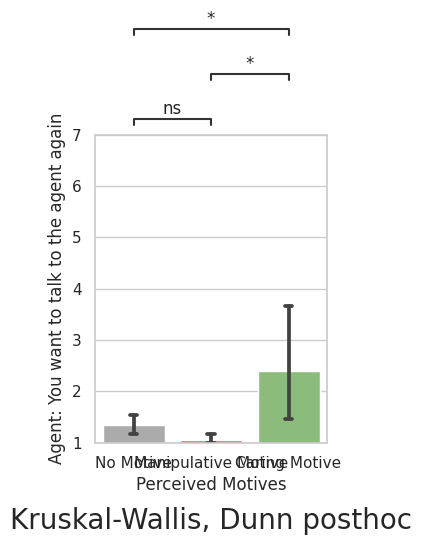

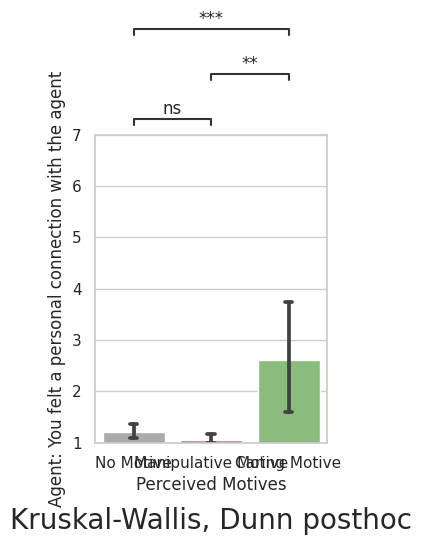

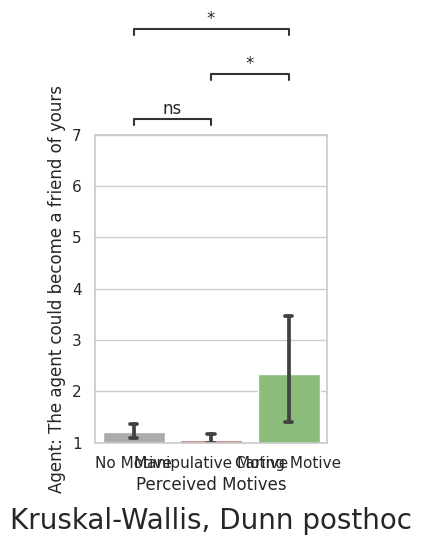

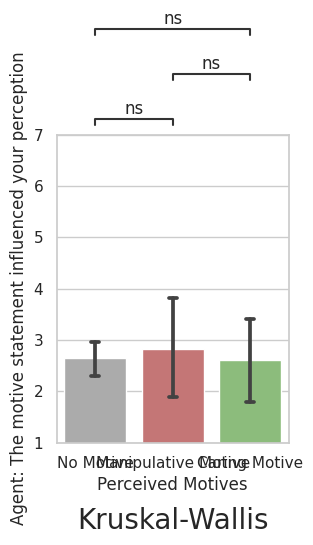

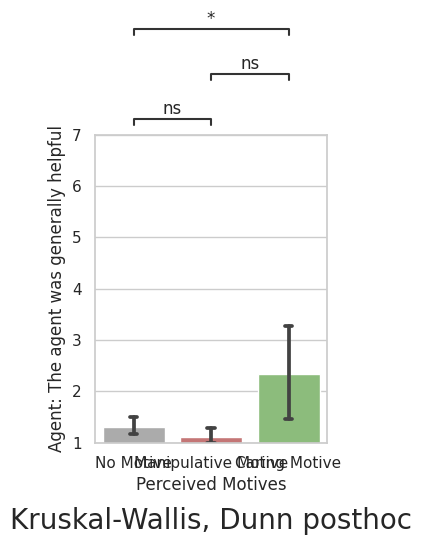

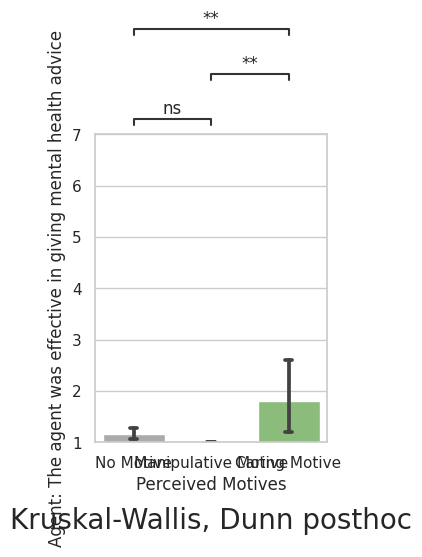

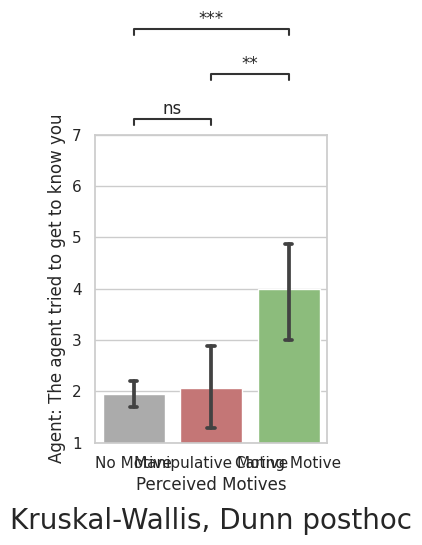

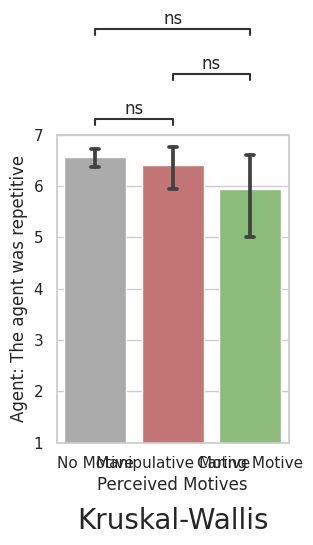

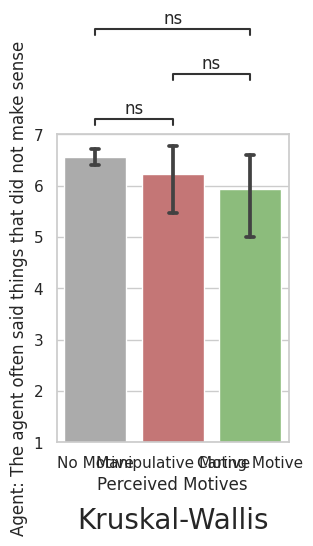

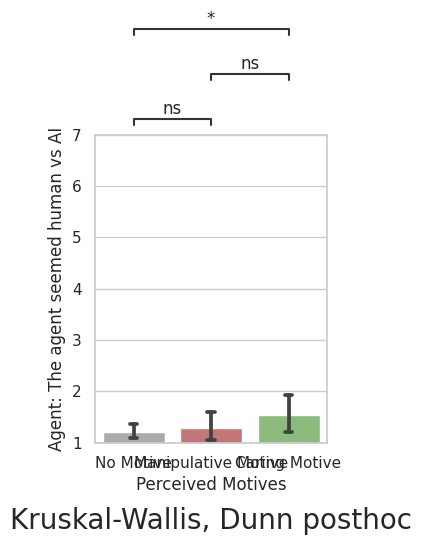

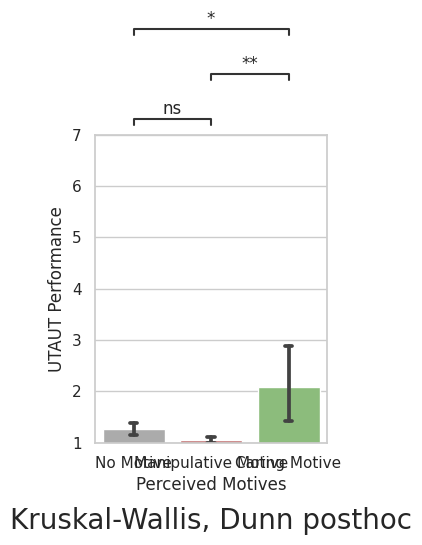

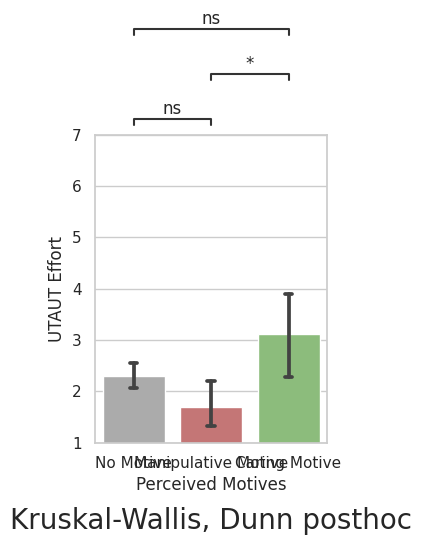

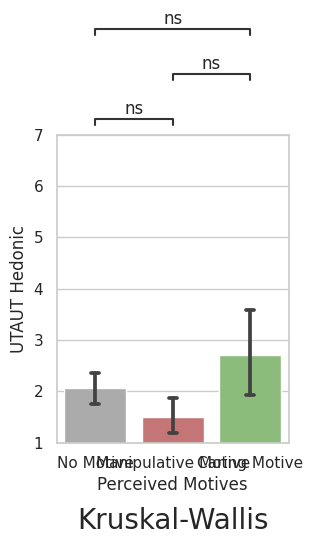

In [12]:
# ELIZA - Perceived

for i in vizlist_lik:
    dvar = df.columns[i]
    print("**********************************")
    print(dvar)
    stat_process.StatTest(df, "Perceived Motives", dvar, conditions_list, viz=True, pal=my_pal, ylims=(1,7))

**********************************
Agent: You would recommend this agent for your friend
[StatTest] Minimal Sample Size was not met. Proceed to check Normality Assumption.
---------------------------------------------
Performing Shapiro-Wilk normality test...
alpha_value: 0.05
ShapiroResult(statistic=0.38178759813308716, pvalue=1.818382998016166e-19)
Series No Motive: is NOT normal. W:0.38178759813308716, Pvalue: 1.818382998016166e-19
ShapiroResult(statistic=1.0, pvalue=1.0)
Series Manipulative Motive: IS normal. W:1.0, Pvalue: 1.0
ShapiroResult(statistic=0.6758687496185303, pvalue=0.0001387922529829666)
Series Caring Motive: is NOT normal. W:0.6758687496185303, Pvalue: 0.0001387922529829666
Normality Assumption Met? : False
[StatTest]  Normality Assumption was not met. Proceed with Kruskal-Wallis Test
---------------------------------------------
alpha: 0.05
KruskalResult(statistic=11.040950352978433, pvalue=0.004003944909502941)
Significant Result for Kruskal Wallis.
Compute the DUNN

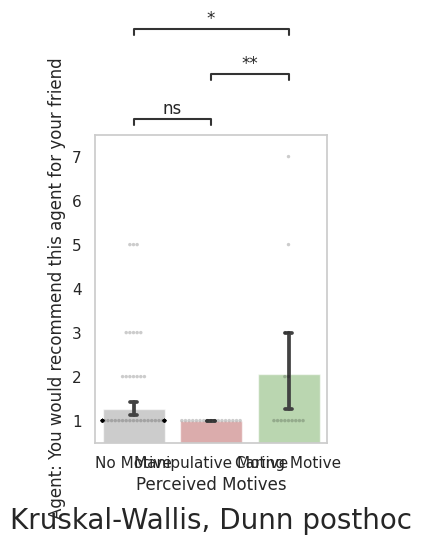

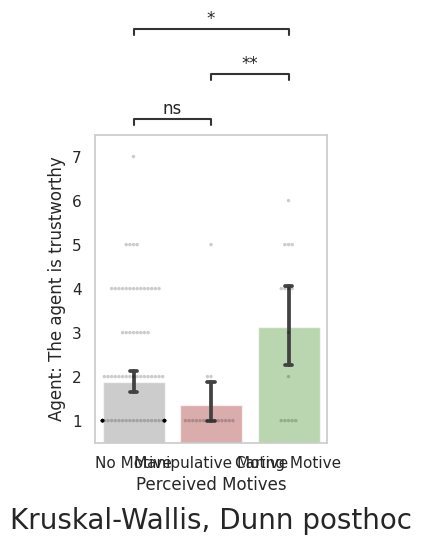

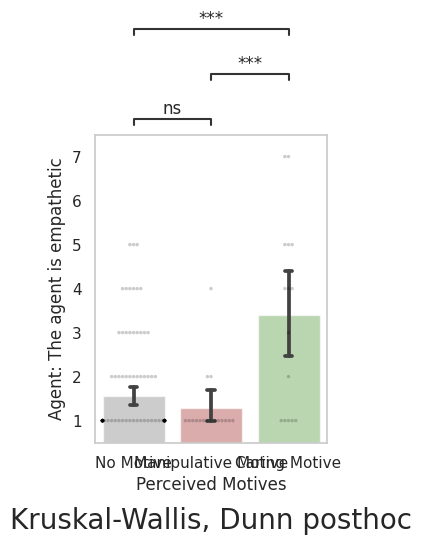

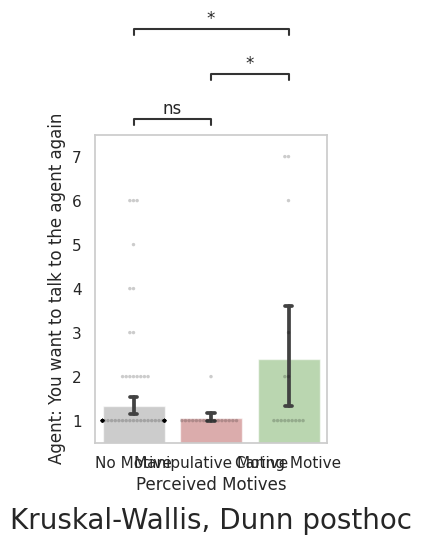

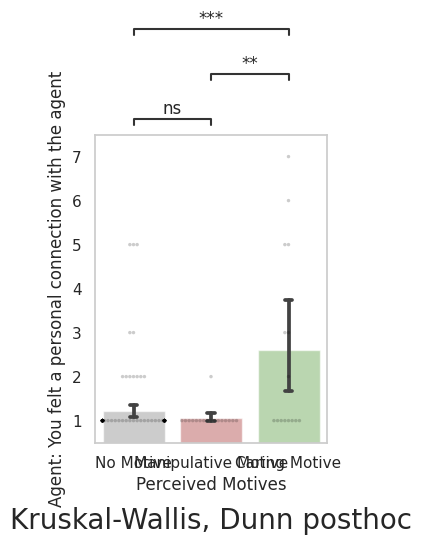

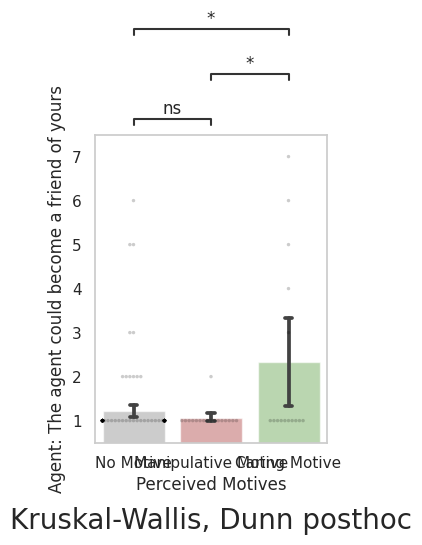

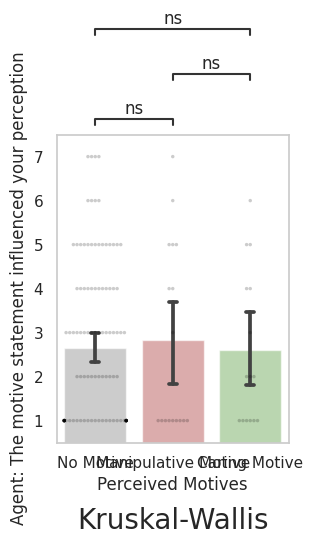

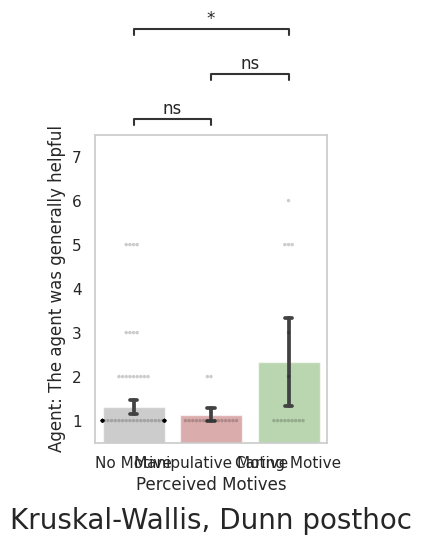

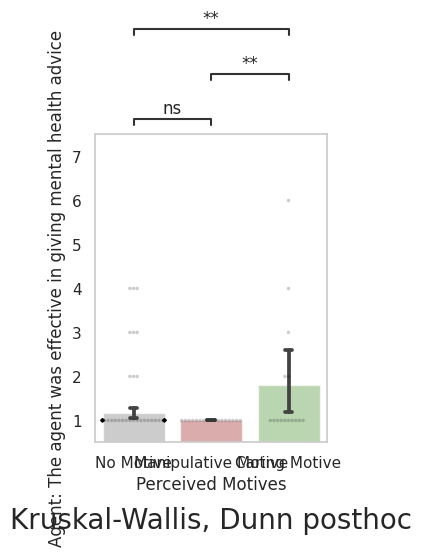

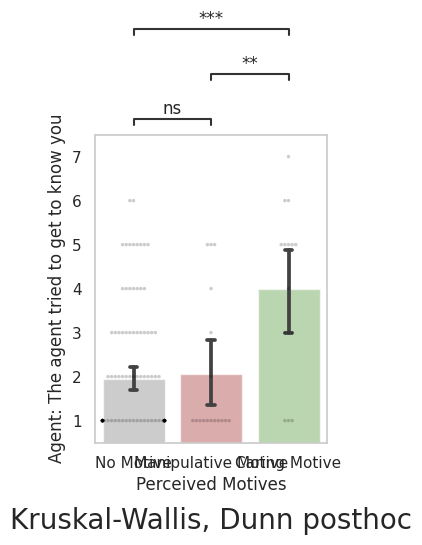

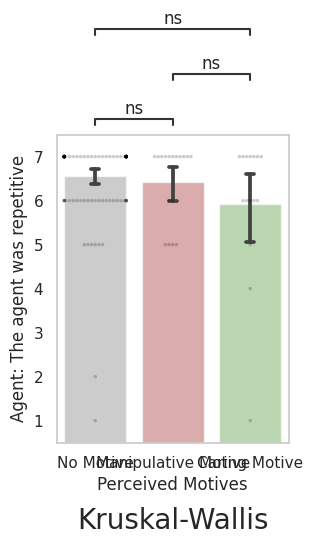

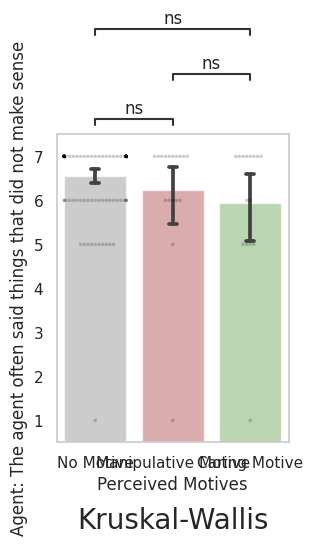

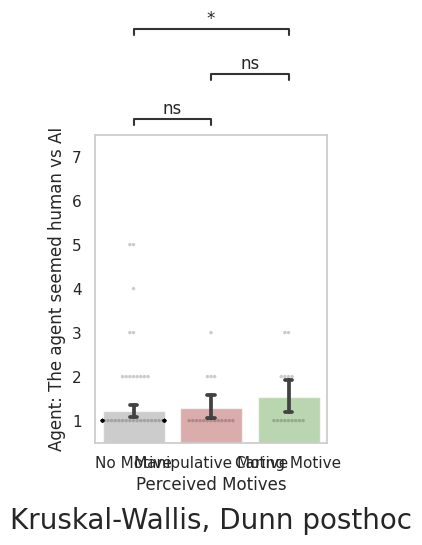

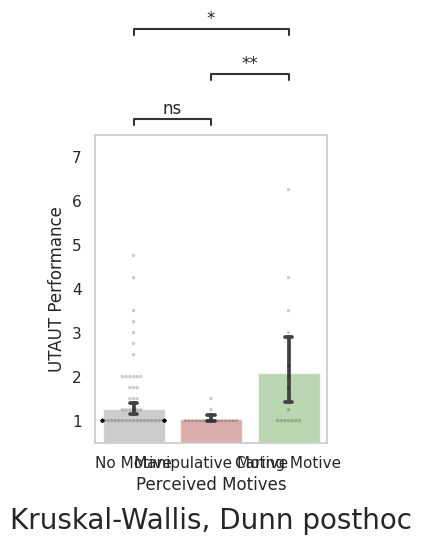

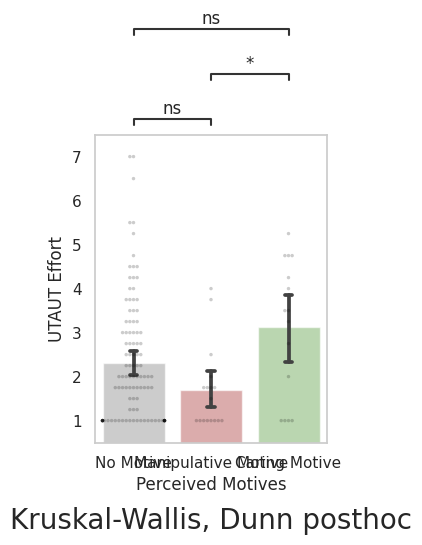

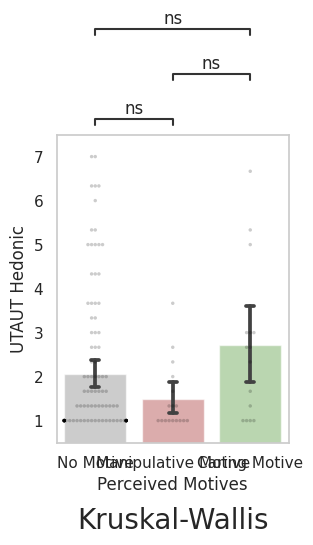

In [63]:
# ELIZA - Perceived

for i in vizlist_lik:
    dvar = df.columns[i]
    print("**********************************")
    print(dvar)
    stat_process.StatTest(df, "Perceived Motives", dvar, conditions_list, viz=True, pal=my_pal, ylims=(0.5,7.5))

[StatTest] Minimal Sample Size was met. Check if sample sizes are roughly equal.
---------------------------------------------
Performing Equal Variances Test...
Performing Levene Test...
homogeneity test: LeveneResult(statistic=0.8654949266722646, pvalue=0.422841240036515)
The populations have equal variances.
[StatTest] Assumption of Equal Variances was met. Run basic ANOVA.
---------------------------------------------
Performing ANOVA
F_onewayResult(statistic=0.986229424061674, pvalue=0.3752789677677496)
oneway ANOVA: no significance. No significant difference between means of the groups.
[StatTest] Tukey found NO statistically significance found between groups.
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No Motive vs. Manipulative Motive: Custom statistical test, P_val:1.000e+00
Manipulative Motive vs. Caring Motive: Custom statistical test, P_va

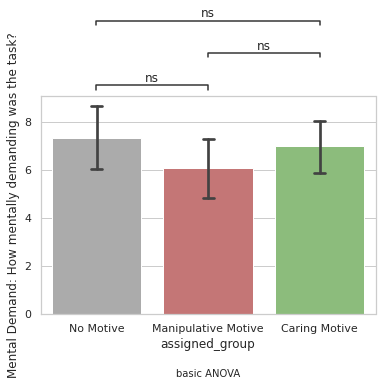

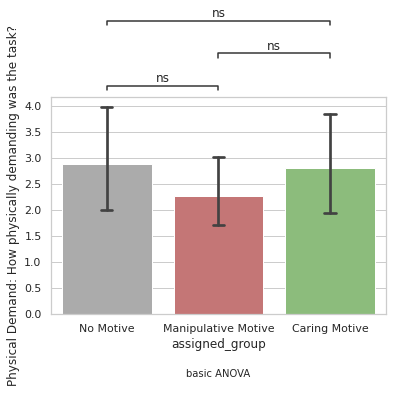

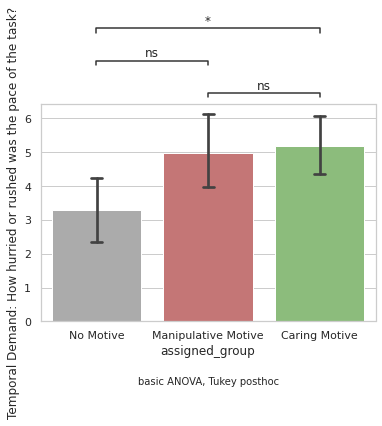

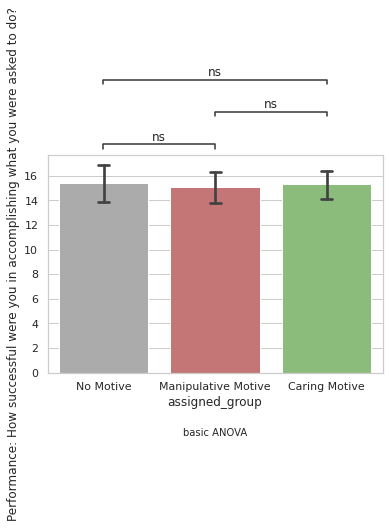

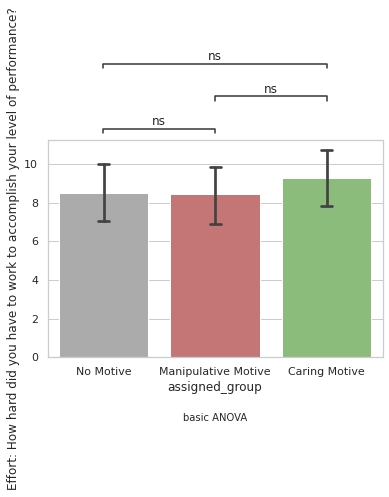

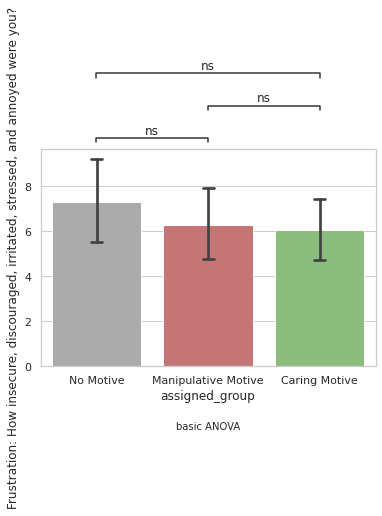

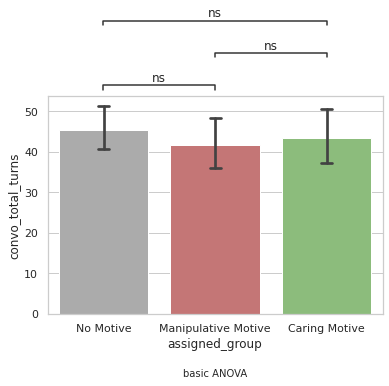

In [ ]:
for i in vizlist_other:
    dvar = df.columns[i]
    stat_process.StatTest(df, ivar, dvar, conditions_list, viz=True, pal=my_pal)

In [ ]:
df_e = pd.read_csv("/work/Results/Eliza_Motive/Processed/eliza_motive_processed_july7.csv")
preProc(df_e)

df_e

Start Date             End Date Response Type IP Address  \
0   2022-07-06 14:57:21  2022-07-06 15:16:10    IP Address    *******   
1   2022-07-06 15:01:35  2022-07-06 15:17:33    IP Address    *******   
2   2022-07-06 15:05:51  2022-07-06 15:19:18    IP Address    *******   
3   2022-07-06 15:12:37  2022-07-06 15:26:05    IP Address    *******   
4   2022-07-06 15:14:17  2022-07-06 15:32:28    IP Address    *******   
..                  ...                  ...           ...        ...   
77  2022-07-06 15:59:45  2022-07-06 16:47:50    IP Address    *******   
78  2022-07-06 16:11:20  2022-07-06 16:57:54    IP Address    *******   
79  2022-07-06 16:12:30  2022-07-06 16:59:20    IP Address    *******   
80  2022-07-06 16:58:01  2022-07-06 17:23:09    IP Address    *******   
81  2022-07-06 17:30:35  2022-07-06 17:45:19    IP Address    *******   

    Progress  Duration in seconds  Finished        Recorded Date  \
0        100                 1128      True  2022-07-06 15:16:10   
1        100                  958      True  2022-07-06 15:17:34   
2        100                  806      True  2022-07-06 15:19:18   
3        100                  807      True  2022-07-06 15:26:05   
4        100                 1090      True  2022-07-06 15:32:28   
..       ...                  ...       ...                  ...   
77       100                 2884      True  2022-07-06 16:47:50   
78       100                 2794      True  2022-07-06 16:57:55   
79       100                 2810      True  2022-07-06 16:59:21   
80       100                 1507      True  2022-07-06 17:23:09   
81       100                  884      True  2022-07-06 17:45:20   

          Response ID Recipient Last Name  ...                session_id  \
0   R_TnJyJNw8NcU93TH             *******  ...  2022-07-06T21:01:13.853Z   
1   R_2BhRWJ3TAvNWyy7             *******  ...  2022-07-06T21:04:02.065Z   
2   R_2QxsKAQvue2j2YG             *******  ...  2022-07-06T21:07:29.812Z   
3   R_2ONNyKfYifHuDZ2             *******  ...  2022-07-06T21:14:13.419Z   
4   R_3OknO3ZQSRU1HIf             *******  ...  2022-07-06T21:18:12.846Z   
..                ...                 ...  ...                       ...   
77  R_3k5NPpyegtcBEpl             *******  ...  2022-07-06T22:04:38.757Z   
78  R_3MMTpS8Yy773SuY             *******  ...  2022-07-06T22:21:21.853Z   
79  R_3HS6mmwCZD1ssi5             *******  ...  2022-07-06T22:14:30.682Z   
80  R_3KLm6cKjpZFtn1v             *******  ...  2022-07-06T23:09:36.375Z   
81  R_2tglDIWEs0ESDjg             *******  ...  2022-07-06T23:32:25.334Z   

                                   convo_conversation       convo_group_id  \
0    >AI: I am Melu, a mental health companion. I ...  Manipulative Motive   
1    >AI: I am Melu, a mental health companion. I ...            No Motive   
2    >AI: I am Melu, a mental health companion. I ...        Caring Motive   
3    >AI: I am Melu, a mental health companion. I ...  Manipulative Motive   
4    >AI: I am Melu, a mental health companion. I ...        Caring Motive   
..                                                ...                  ...   
77   >AI: I am Melu, a mental health companion. I ...  Manipulative Motive   
78   >AI: I am Melu, a mental health companion. I ...            No Motive   
79   >AI: I am Melu, a mental health companion. I ...        Caring Motive   
80   >AI: I am Melu, a mental health companion. I ...        Caring Motive   
81   >AI: I am Melu, a mental health companion. I ...            No Motive   

   convo_AI_turns convo_human_turns convo_total_turns    Perceived Motives  \
0              31                30                61            No Motive   
1              50                49                99            No Motive   
2              85                84               169            No Motive   
3              68                67               135  Manipulative Motive   
4              39                38                77            No Motive   
.

In [ ]:
# get list of questions to vizualize
start = df_e.columns.get_loc("Agent: You would recommend this agent for your friend")
end = start + 13
tli_s = df_e.columns.get_loc("Mental Demand: How mentally demanding was the task?")
tli_e = tli_s + 6
utaut = [df_e.columns.get_loc("UTAUT Performance"),
         df_e.columns.get_loc("UTAUT Effort"),
         df_e.columns.get_loc("UTAUT Hedonic")]
other = [df_e.columns.get_loc("convo_total_turns")]
vizlist_tli_e = list(range(tli_s,tli_e))
vizlist_e = list(range(start,end)) + vizlist_tli_e + utaut + other

vizlist_lik_e = list(range(start,end)) + utaut
vizlist_other_e = list(range(tli_s,tli_e)) + other
vizlist_e

[46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 70,
 71,
 72,
 73,
 74,
 75,
 98,
 99,
 100,
 96]

[StatTest] Minimal Sample Size was met. Check if sample sizes are roughly equal.
---------------------------------------------
Performing Equal Variances Test...
Performing Levene Test...
homogeneity test: LeveneResult(statistic=0.43627568463436217, pvalue=0.6479874454710904)
The populations have equal variances.
[StatTest] Assumption of Equal Variances was met. Run basic ANOVA.
---------------------------------------------
Performing ANOVA
F_onewayResult(statistic=0.4362756846343624, pvalue=0.6479874454710904)
oneway ANOVA: no significance. No significant difference between means of the groups.
[StatTest] Tukey found NO statistically significance found between groups.
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No Motive vs. Manipulative Motive: Custom statistical test, P_val:1.000e+00
Manipulative Motive vs. Caring Motive: Custom statistical test, P

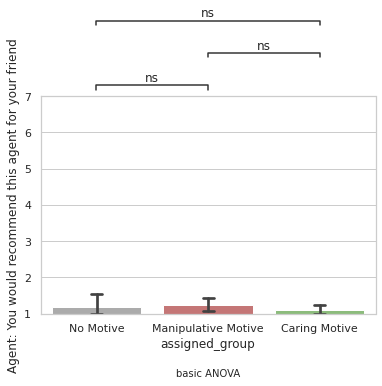

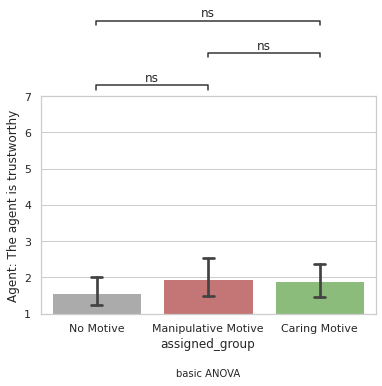

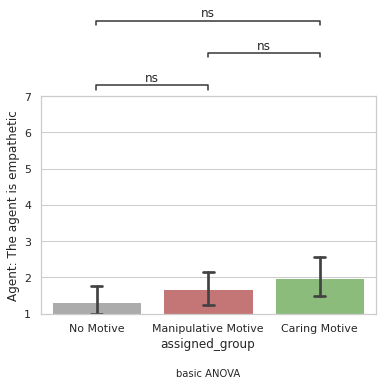

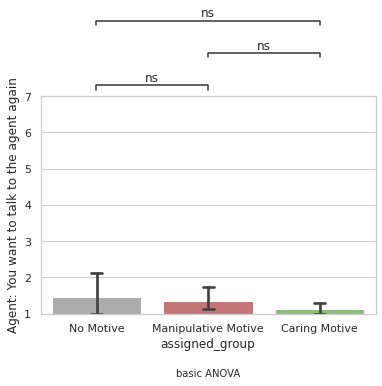

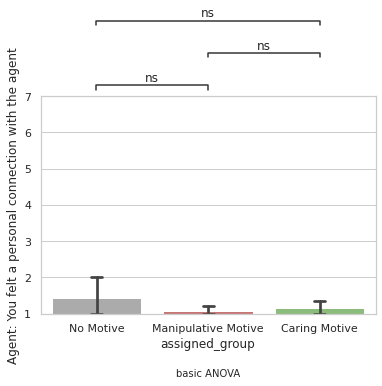

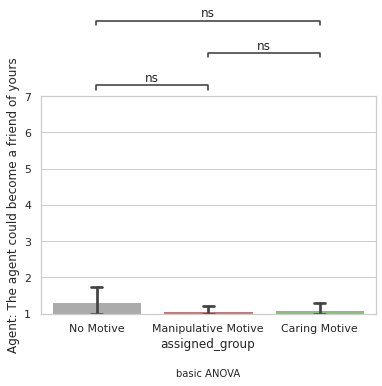

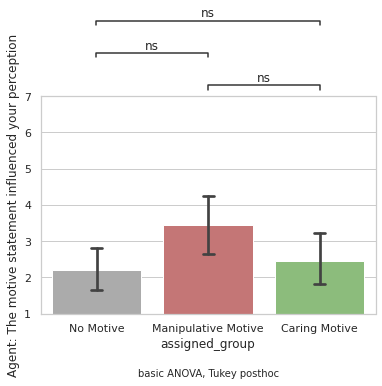

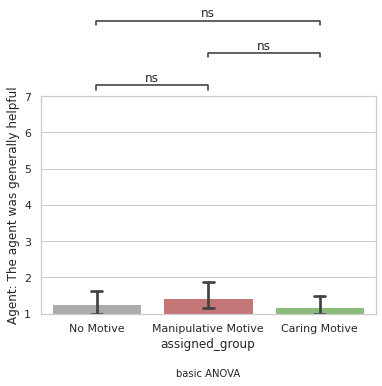

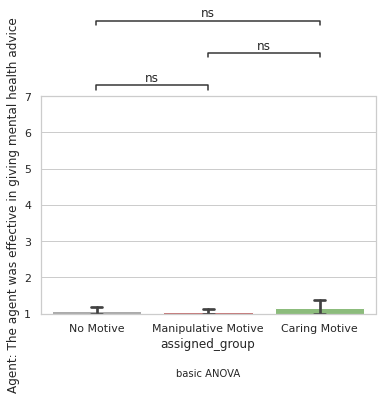

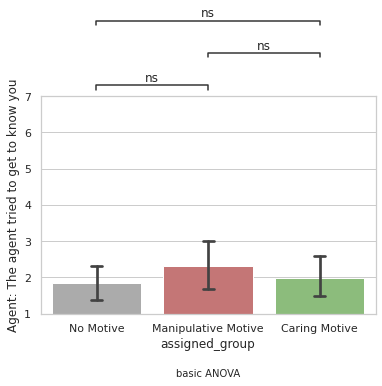

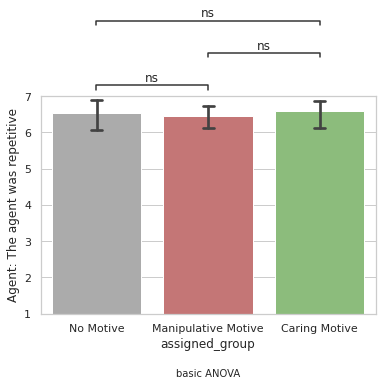

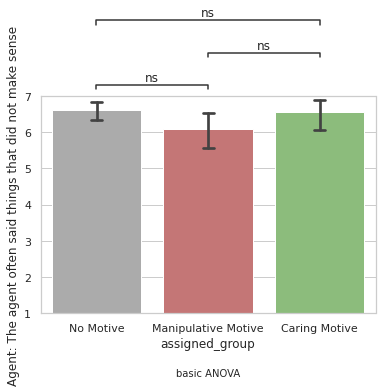

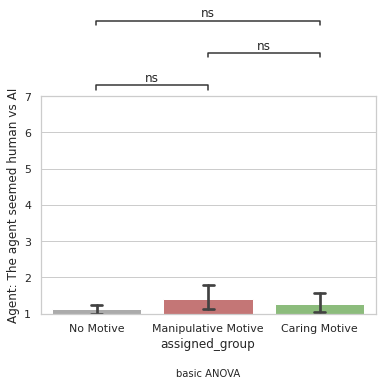

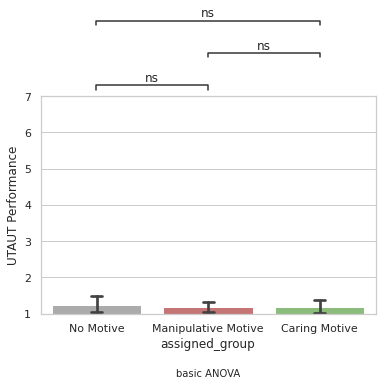

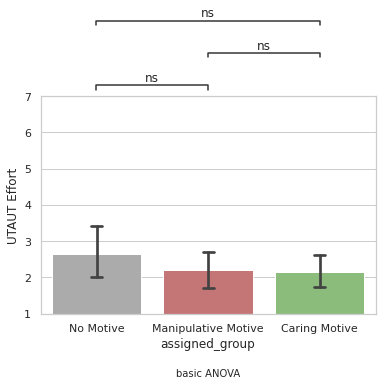

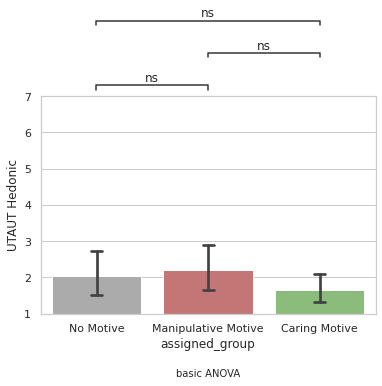

In [ ]:
for i in vizlist_lik_e:
    dvar = df_e.columns[i]
    stat_process.StatTest(df_e, ivar, dvar, conditions_list, viz=True, pal=my_pal, ylims=(1,7))

[StatTest] Minimal Sample Size was not met. Proceed to check Normality Assumption.
---------------------------------------------
Performing Shapiro-Wilk normality test...
alpha_value: 0.05
ShapiroResult(statistic=0.32021093368530273, pvalue=1.5717816113859813e-14)
Series No Motive: is NOT normal. W:0.32021093368530273, Pvalue: 1.5717816113859813e-14
ShapiroResult(statistic=1.0, pvalue=1.0)
Series Manipulative Motive: IS normal. W:1.0, Pvalue: 1.0
ShapiroResult(statistic=0.6191263198852539, pvalue=4.404573337524198e-05)
Series Caring Motive: is NOT normal. W:0.6191263198852539, Pvalue: 4.404573337524198e-05
Normality Assumption Met? : False
[StatTest]  Normality Assumption was not met. Proceed with Kruskal-Wallis Test
---------------------------------------------
alpha: 0.05
KruskalResult(statistic=3.9689142118982264, pvalue=0.13745521748409525)
No significant result for Kruskal Wallis. No DUNN post-hoc test.
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5

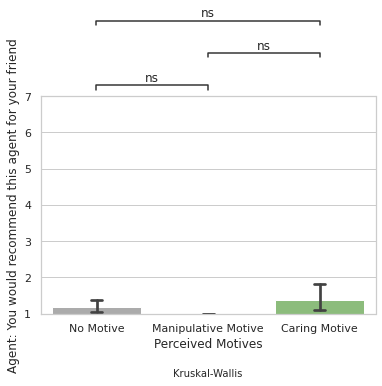

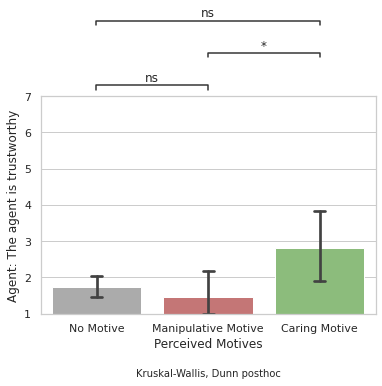

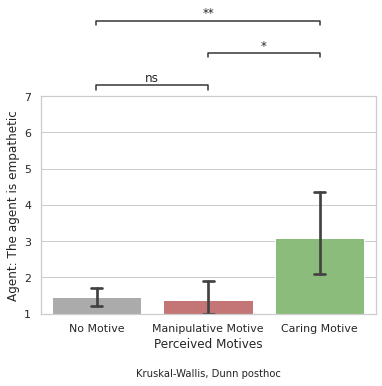

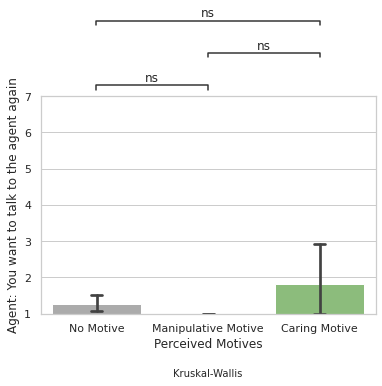

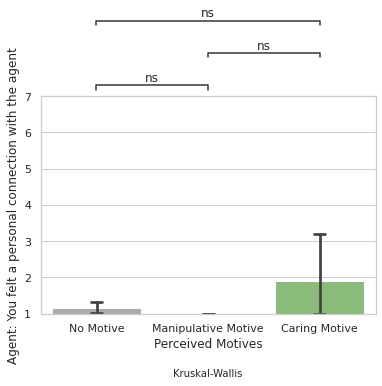

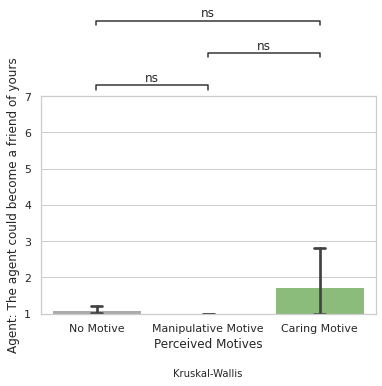

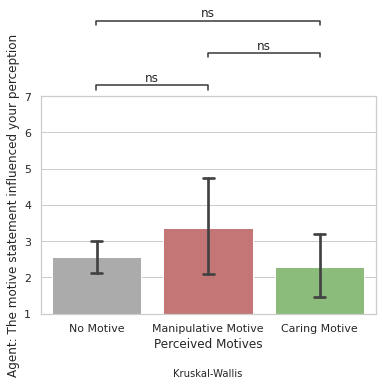

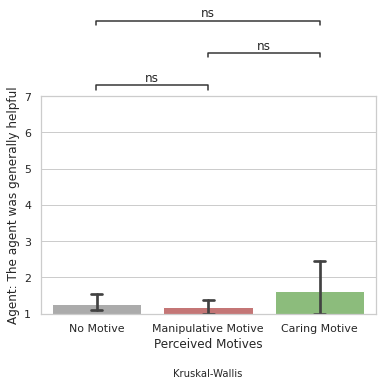

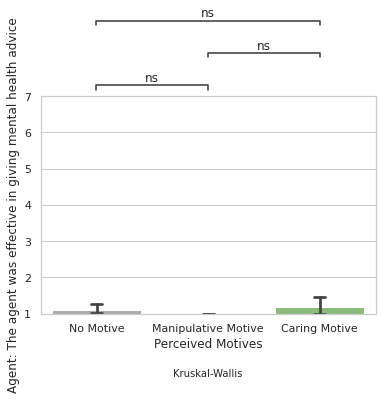

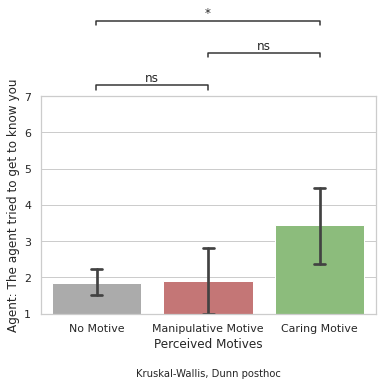

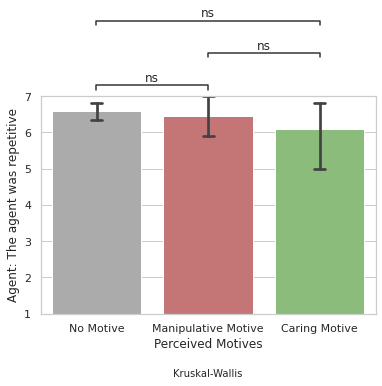

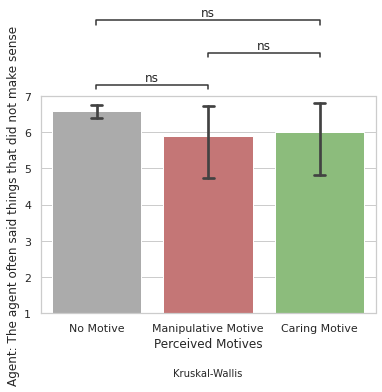

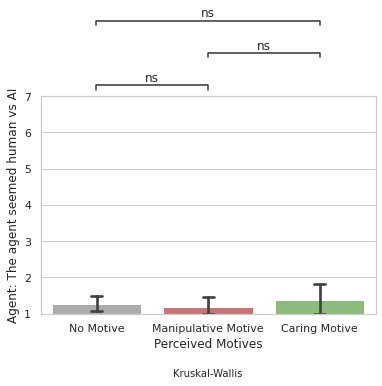

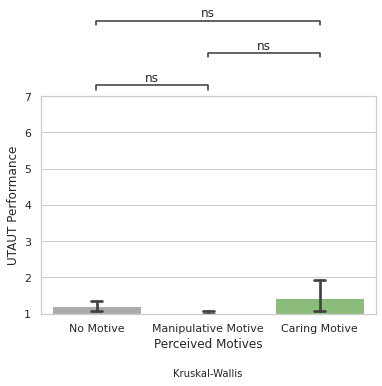

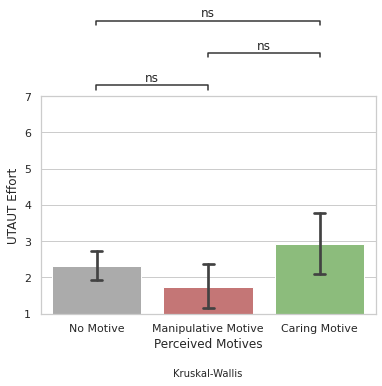

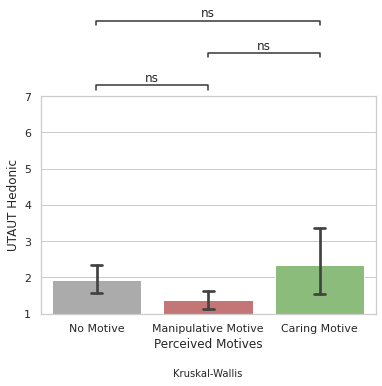

In [ ]:
for i in vizlist_lik_e:
    dvar = df_e.columns[i]
    stat_process.StatTest(df_e, "Perceived Motives", dvar, conditions_list, viz=True, pal=my_pal, ylims=(1,7))

In [7]:
df[df['assigned_group'] == 'No Motive']['Perceived Motives'].value_counts()

No Motive              42
Caring Motive           8
Manipulative Motive     3
Name: Perceived Motives, dtype: int64

In [11]:
df['assigned_group'].value_counts()

Caring Motive          54
No Motive              54
Manipulative Motive    52
Name: assigned_group, dtype: int64

In [8]:
df[df['assigned_group'] == 'Caring Motive']['Perceived Motives'].value_counts()

Caring Motive          48
No Motive               5
Manipulative Motive     1
Name: Perceived Motives, dtype: int64

In [9]:
df[df['assigned_group'] == 'Manipulative Motive']['Perceived Motives'].value_counts()

Caring Motive          22
No Motive              16
Manipulative Motive    12
Name: Perceived Motives, dtype: int64

In [ ]:
groupmap = {'None' : [41, 3, 2], 'Caring' : [35, 10, 6], 'Manipulative': [34, 9, 2]}
df_gmap = pd.DataFrame(groupmap)
df_gmap.index = ['None', 'Caring', 'Manipulative']
df_gmap

None  Caring  Manipulative
None            41      35            34
Caring           3      10             9
Manipulative     2       6             2

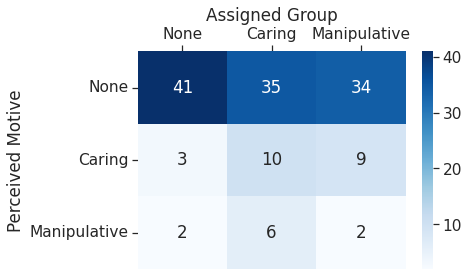

In [ ]:
sns.set(font_scale=1.4)
ax = sns.heatmap(df_gmap, cmap="Blues", annot=True)
ax.set(title='Assigned Group', ylabel='Perceived Motive')
ax.tick_params(top=True, left=True, labeltop=True, bottom=False, labelbottom=False)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=04692bf1-ada2-4f5b-ba0a-e356adb8d056' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>